# Airline Customer Satisfaction: EFA, Logistic Regression, & Visualizations
#### _Author: Titas Saha_
##### _2022-04-21_


## Table of Contents

[1. Goals](#1)

[2. Dataset](#2)

[3. Cleaning the dataset](#3)

[4. Correlation Matrix](#4)

[5. Exploratory Factor Analysis](#5)

[6. Exploratory Factor Analysis Interpretation](#6)

[7. Logistic Regression](#7)

[8. Prediction on Test Data](#8)

[9. Results of Logistic Regression](#9)

[10. Visualizations](#10)

<a id="1"></a> <br>
### Goals

1. Conduct an exploratory factor analysis to find out latent variables and understand which customer satisfaction factors group together 

2. Which factors affect satisfaction the most? Conduct logistic regression to find this out

3.  Explore the significant variables and visualize them.

### Packages and libraries

In [1]:
knitr::opts_chunk$set(warning = FALSE, message = FALSE) 

In [2]:
install.packages(c("psych","GPArotation"), dependencies = TRUE)
library(tidyr)
library(dplyr)
library(tidyverse)
library(corrplot)
library(psych)
library(GPArotation)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependencies ‘graph’, ‘Rgraphviz’ are not available”
also installing the dependencies ‘nloptr’, ‘psychTools’, ‘lme4’, ‘Rcsdp’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

corrplot 0.92 loaded


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




<a id="2"></a> <br>
### Dataset

In [3]:
ds <- read.csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
head(ds)
dim(ds)
str(ds)

,X,id,Gender,Customer.Type,Age,Type.of.Travel,Class,Flight.Distance,Inflight.wifi.service,Departure.Arrival.time.convenient,⋯,Inflight.entertainment,On.board.service,Leg.room.service,Baggage.handling,Checkin.service,Inflight.service,Cleanliness,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes,satisfaction
,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,⋯,5,4,3,4,4,5,5,25,18,neutral or dissatisfied
2,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,⋯,1,1,5,3,1,4,1,1,6,neutral or dissatisfied
3,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,⋯,5,4,3,4,4,4,5,0,0,satisfied
4,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,⋯,2,2,5,3,1,4,2,11,9,neutral or dissatisfied
5,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,⋯,3,3,4,4,3,3,3,0,0,satisfied
6,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,⋯,1,3,4,4,4,4,1,0,0,neutral or dissatisfied


[1] 103904     25

'data.frame':	103904 obs. of  25 variables:
 $ X                                : int  0 1 2 3 4 5 6 7 8 9 ...
 $ id                               : int  70172 5047 110028 24026 119299 111157 82113 96462 79485 65725 ...
 $ Gender                           : chr  "Male" "Male" "Female" "Female" ...
 $ Customer.Type                    : chr  "Loyal Customer" "disloyal Customer" "Loyal Customer" "Loyal Customer" ...
 $ Age                              : int  13 25 26 25 61 26 47 52 41 20 ...
 $ Type.of.Travel                   : chr  "Personal Travel" "Business travel" "Business travel" "Business travel" ...
 $ Class                            : chr  "Eco Plus" "Business" "Business" "Business" ...
 $ Flight.Distance                  : int  460 235 1142 562 214 1180 1276 2035 853 1061 ...
 $ Inflight.wifi.service            : int  3 3 2 2 3 3 2 4 1 3 ...
 $ Departure.Arrival.time.convenient: int  4 2 2 5 3 4 4 3 2 3 ...
 $ Ease.of.Online.booking           : int  3 3 2 5 3 2 2 4 2 3 ...
 $ 

**Observations**

- The dataset contains 25 columns and 103904 entries from customers.
- Personal information on customers include gender and age.
- Flight habits of customers are recorded as customer type, the type of travel they use, class of flight, and the distance they have travelled.
- Customer satisfaction is registered over several variables 

<a id="3"></a> <br>
### Cleaning the dataset

- Let's check the presence of NA's , outliers, and variables that are not useful

In [4]:
any(is.na(ds))
summary(ds)

[1] TRUE

       X                id            Gender          Customer.Type     
 Min.   :     0   Min.   :     1   Length:103904      Length:103904     
 1st Qu.: 25976   1st Qu.: 32534   Class :character   Class :character  
 Median : 51952   Median : 64856   Mode  :character   Mode  :character  
 Mean   : 51952   Mean   : 64924                                        
 3rd Qu.: 77927   3rd Qu.: 97368                                        
 Max.   :103903   Max.   :129880                                        
                                                                        
      Age        Type.of.Travel        Class           Flight.Distance
 Min.   : 7.00   Length:103904      Length:103904      Min.   :  31   
 1st Qu.:27.00   Class :character   Class :character   1st Qu.: 414   
 Median :40.00   Mode  :character   Mode  :character   Median : 843   
 Mean   :39.38                                         Mean   :1189   
 3rd Qu.:51.00                                         3rd Qu

**Observations**
- There are 310 missing values in "Arrival.Delay.in.Minutes". I will replace the NA's with its median=0 to normalize it.
- I will remove column X which is the serial number as it's not needed
- Arrival.Delay.in.Minutes is in num datatype, let's change that to int

In [5]:
ds <- subset(ds,select = -X)
ds$Departure.Delay.in.Minutes = as.numeric(ds$Departure.Delay.in.Minutes)
ds$Arrival.Delay.in.Minutes[is.na(ds$Arrival.Delay.in.Minutes)] <-0
any(is.na(ds))

[1] FALSE

Now that the NA's are replaced, let's look at the plot of outliers in numerical variables

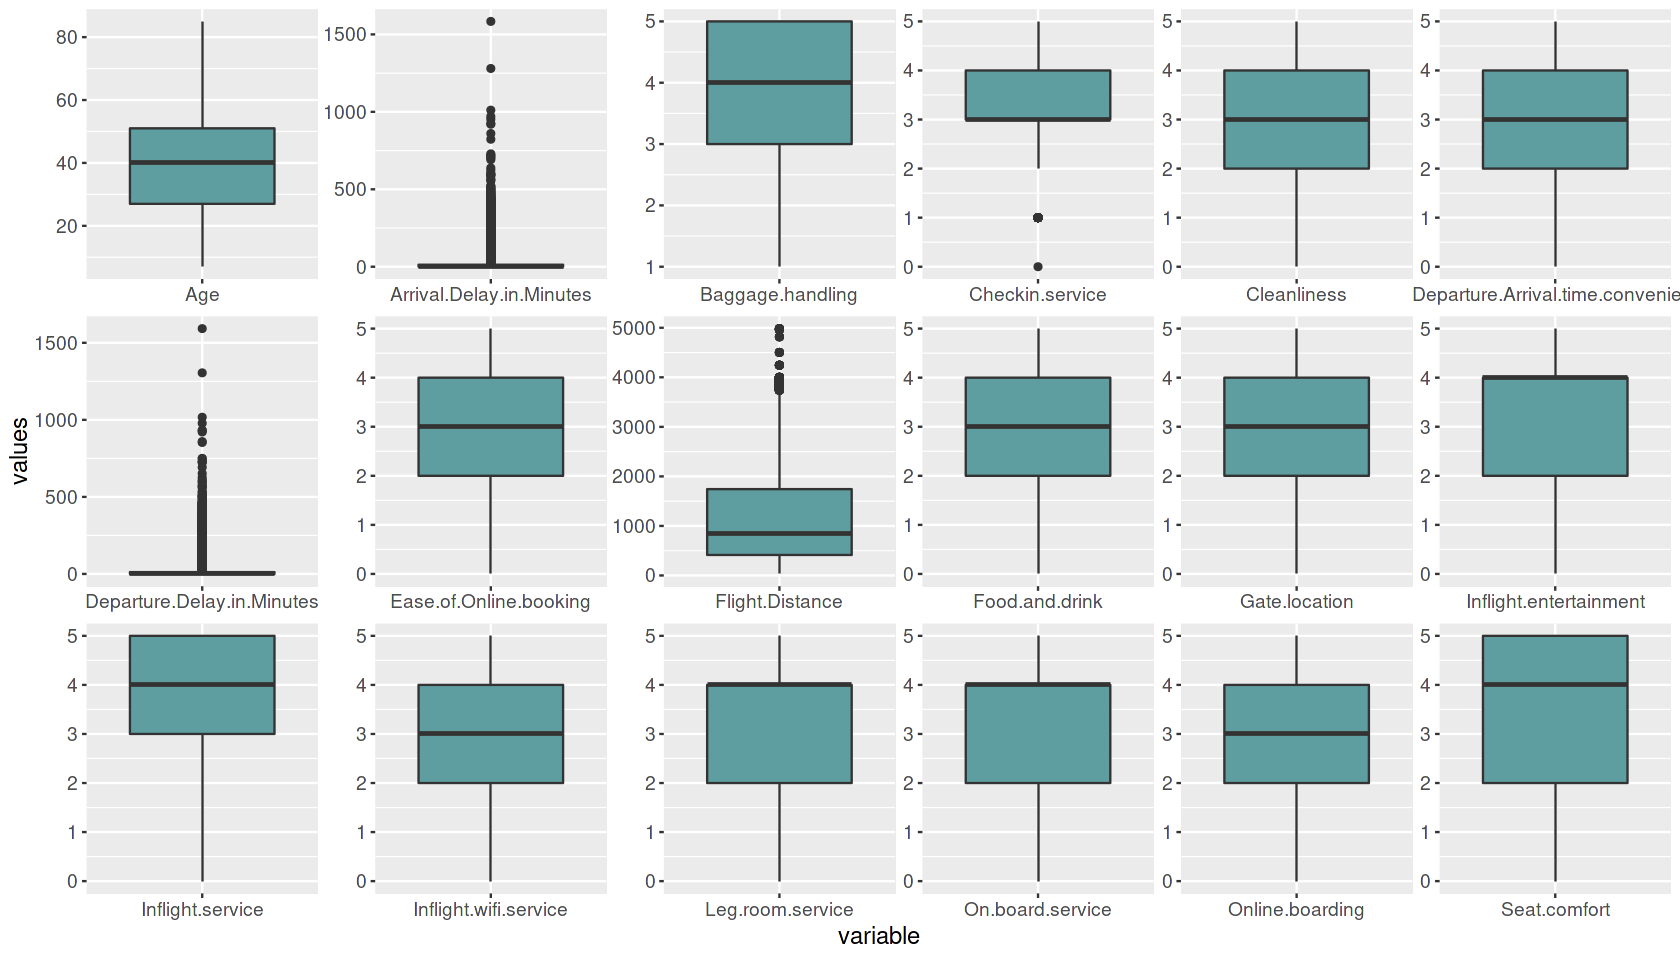

In [6]:
ds_num<-select_if(ds,is.numeric)%>%select(-id)
ds_num_p<-ds_num %>% gather(variable,values,1:18 )
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(ds_num_p)+
  geom_boxplot(aes(x=variable,y=values),fill="cadetblue") + 
  facet_wrap(~variable,ncol=6,scales="free") + 
  theme(strip.text.x = element_blank(),
        text = element_text(size=14))  

**Observation**

- The variables with outliers are departure, arrival, flight distance, and rating on check-in service. None of these variables can be modified as they contain subjective data. 

**Outcome Variable**

- This is the dependent variable in the dataset. 

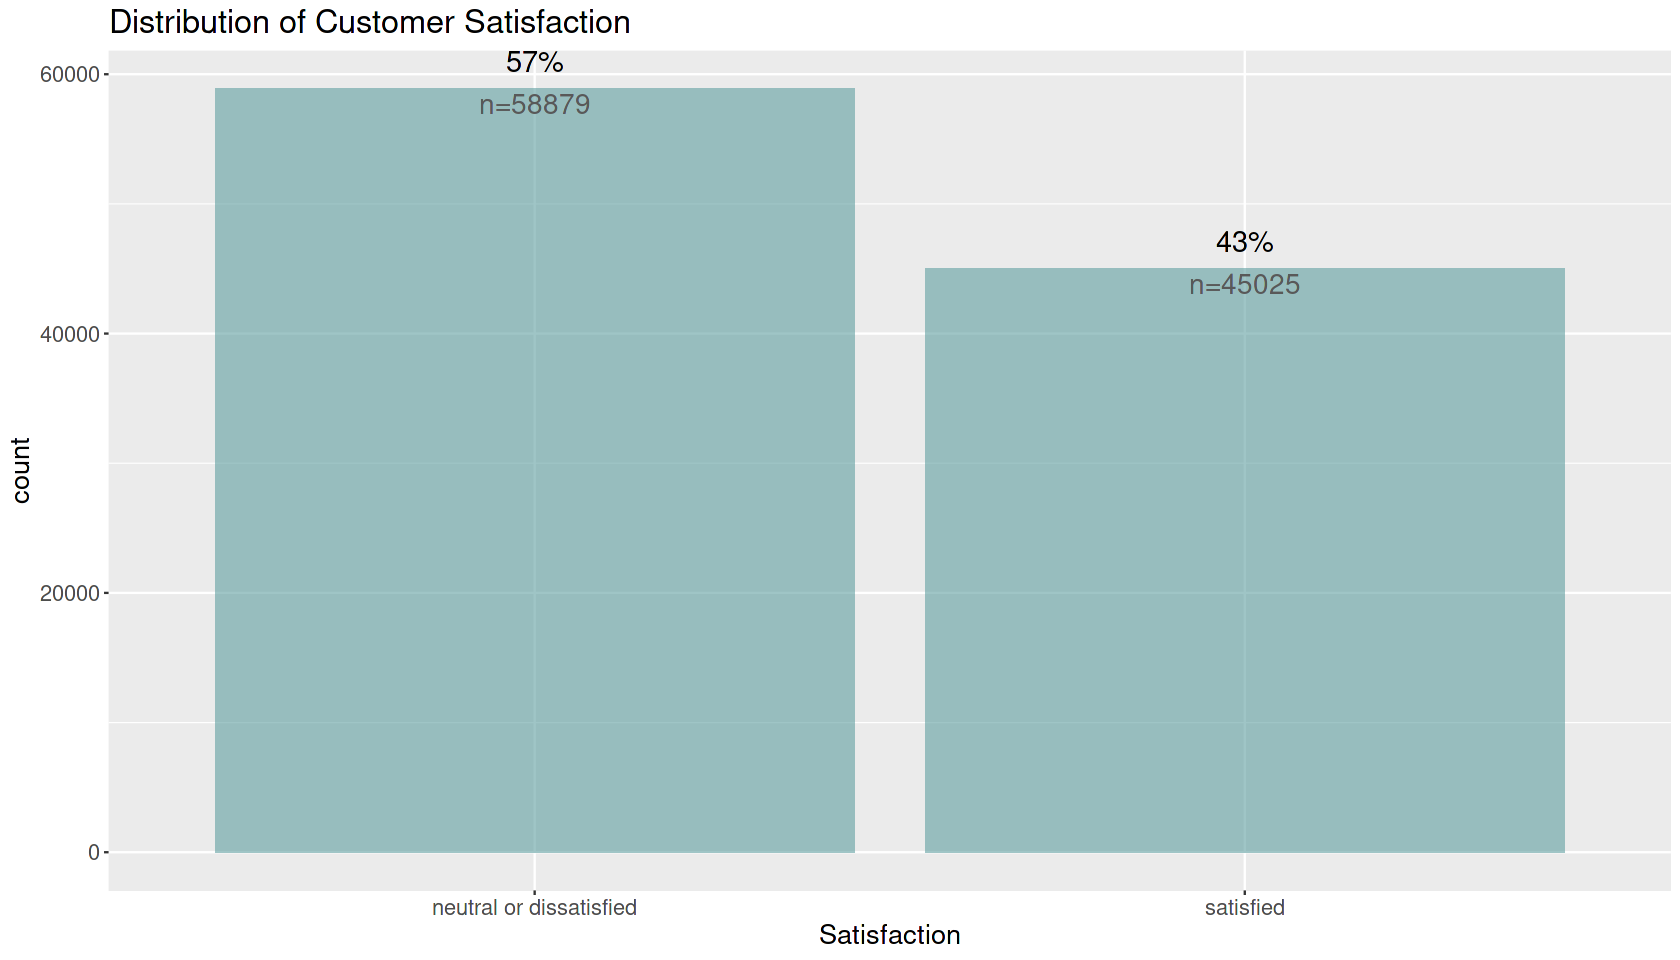

In [7]:
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(ds, aes(x=`satisfaction`))+
  geom_bar(fill="cadetblue", alpha=0.6)+
  geom_text(aes(label=scales::percent((..count..)/sum(..count..))), stat="count", vjust = -0.8, size=6)+
  stat_count(aes(y=..count..,label=paste0("n=",..count..)),geom="text",vjust=1.2,size=5.8,color="gray35")+
  labs(x="Satisfaction", title = "Distribution of Customer Satisfaction")+
  theme(text = element_text(size=16)) 

<a id="4"></a> <br>
### Correlation Matrix

Let's take a look at the correlation matrix of the dataset. This will be done in 2 parts:

1) Numerical variables

2) Categorical variables

**Numerical variable Correlation Plot**

      Age           Flight.Distance     Departure.Delay.in.Minutes
 Min.   :-0.01210   Min.   :-0.002470   Min.   :-0.0101522        
 1st Qu.:-0.01064   1st Qu.: 0.001001   1st Qu.:-0.0009195        
 Median : 0.04465   Median : 0.050809   Median : 0.4812026        
 Mean   : 0.26930   Mean   : 0.274787   Mean   : 0.4880632        
 3rd Qu.: 0.32460   3rd Qu.: 0.324596   3rd Qu.: 0.9701853        
 Max.   : 1.00000   Max.   : 1.000000   Max.   : 1.0000000        
 Arrival.Delay.in.Minutes
 Min.   :-0.012105       
 1st Qu.:-0.004879       
 Median : 0.478888       
 Mean   : 0.486418       
 3rd Qu.: 0.970185       
 Max.   : 1.000000       

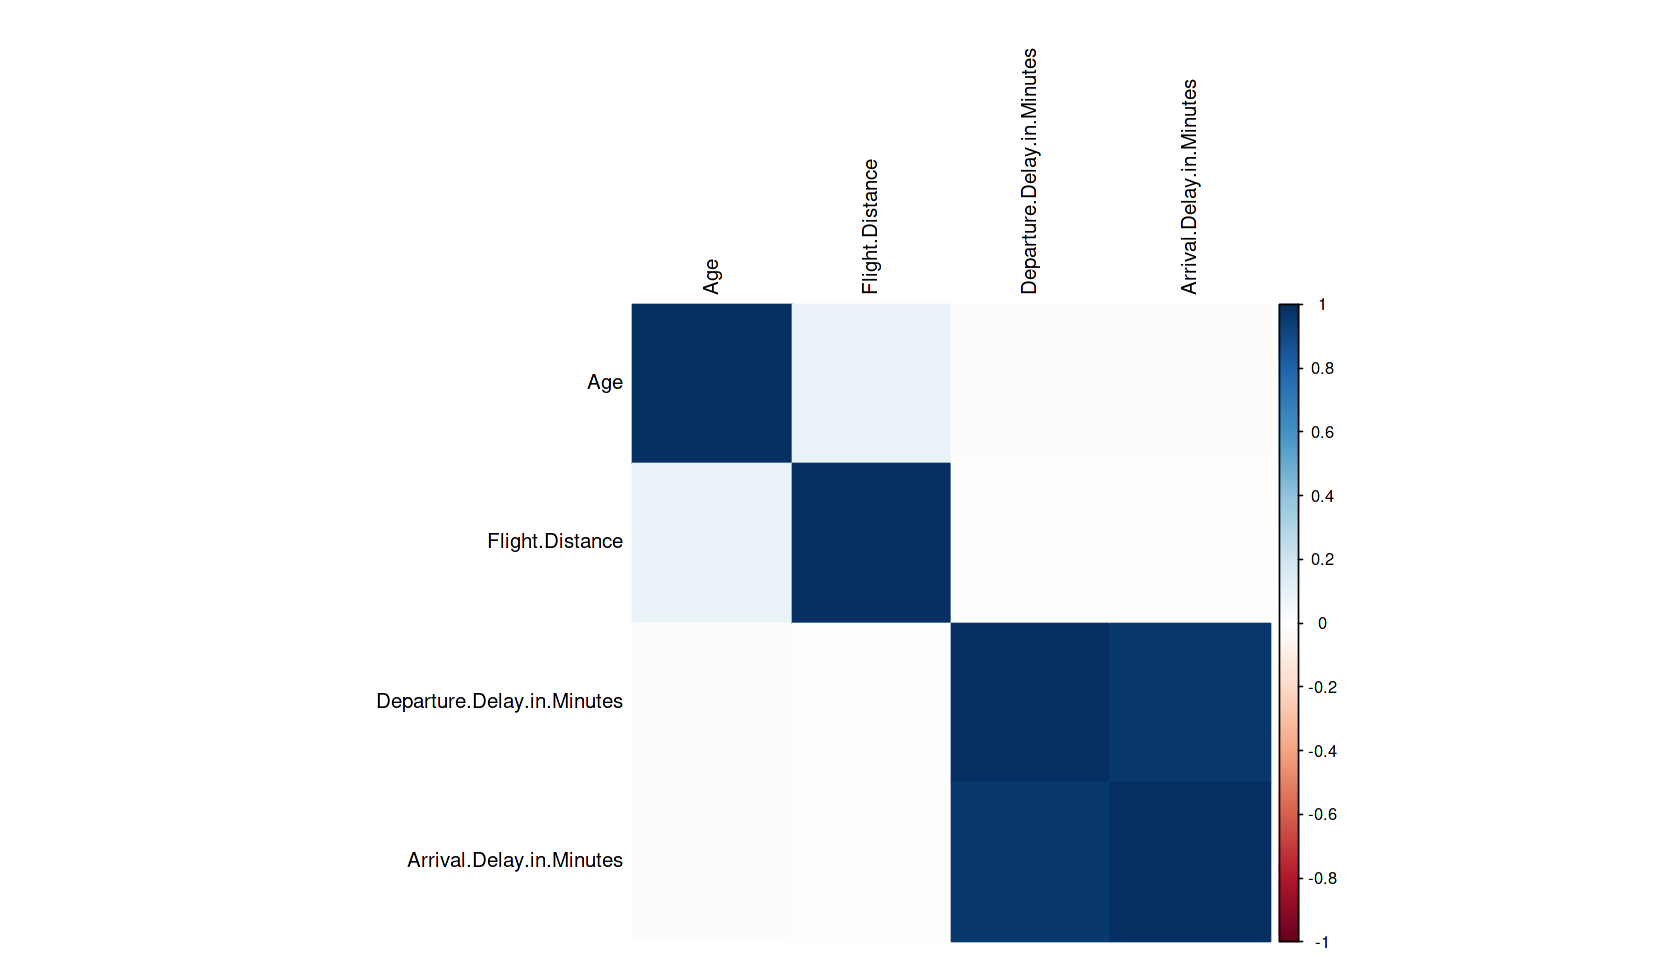

In [8]:
ds_cor1 <- cor(subset(ds,select = c(Age, Flight.Distance,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes)))
summary(ds_cor1)
options(repr.plot.width = 14, repr.plot.height = 8)
corrplot(ds_cor1, na.label = " ", method="color", tl.col = "black", tl.cex = 1)

**Categorical variable Correlation Plot**

 Inflight.wifi.service Departure.Arrival.time.convenient Ease.of.Online.booking
 Min.   :0.04319       Min.   :-0.004861                 Min.   :0.01108       
 1st Qu.:0.12179       1st Qu.: 0.012904                 1st Qu.:0.03272       
 Median :0.14760       Median : 0.071122                 Median :0.04293       
 Mean   :0.28635       Mean   : 0.188676                 Mean   :0.24087       
 3rd Qu.:0.34195       3rd Qu.: 0.281217                 3rd Qu.:0.42874       
 Max.   :1.00000       Max.   : 1.000000                 Max.   :1.00000       
 Gate.location       Food.and.drink      Online.boarding     Seat.comfort     
 Min.   :-0.035428   Min.   :-0.001159   Min.   :0.001688   Min.   :0.003669  
 1st Qu.:-0.003162   1st Qu.: 0.032871   1st Qu.:0.093448   1st Qu.:0.070549  
 Median : 0.002001   Median : 0.073186   Median :0.219465   Median :0.127314  
 Mean   : 0.155562   Mean   : 0.250517   Mean   :0.274701   Mean   :0.287480  
 3rd Qu.: 0.253103   3rd Qu.: 0.489534   3rd 

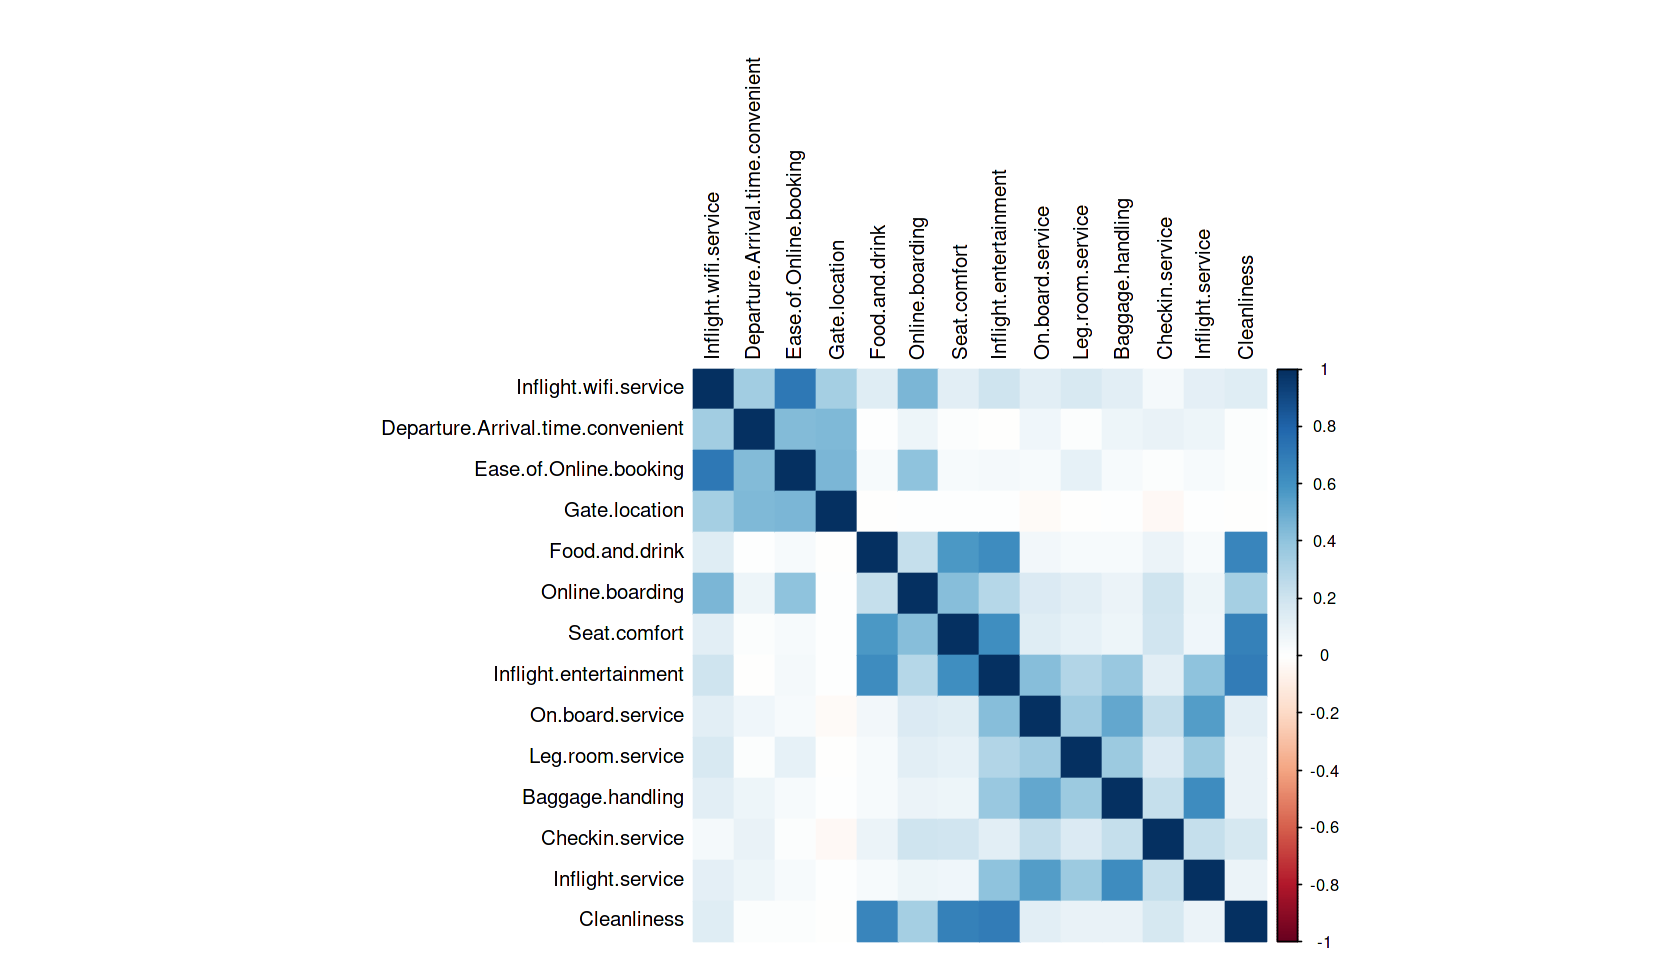

In [9]:
ds_cor2 <- cor(select_if(subset(ds, select=-c(id, Age, Flight.Distance,Departure.Delay.in.Minutes,Arrival.Delay.in.Minutes)), is.numeric))
summary(ds_cor2)
options(repr.plot.width = 14, repr.plot.height = 8)
corrplot(ds_cor2, na.label=" ", tl.cex=1, tl.col="black", method="color")

**Observations**

- There is a high positive correlation between arrival delay and departure delay. If a flight departs late, it is likely to arrive late as well. 

- Variables such as seat comfort, food and drink, and in-flight entertainment tend to have a positive correlation.
- Variables such as WiFi service, online booking, and gate location tend to have a positive correlation.
- Cleanliness is correlated with gate location, food and drink, seat comfort, and in-flight entertainment. 

<a id="5"></a> <br>
### Exploratory Factor Analysis

#### Step 1: Check factorability

Let's check whether the dataset is factorable using :

- The Kaiser-Meyer-Olkin test 
- Barlett test

**Kaiser-Meyer-Olkin test**

In [10]:
KMO(ds_cor2)

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = ds_cor2)
Overall MSA =  0.78
MSA for each item = 
            Inflight.wifi.service Departure.Arrival.time.convenient 
                             0.74                              0.75 
           Ease.of.Online.booking                     Gate.location 
                             0.68                              0.71 
                   Food.and.drink                   Online.boarding 
                             0.84                              0.74 
                     Seat.comfort            Inflight.entertainment 
                             0.83                              0.77 
                 On.board.service                  Leg.room.service 
                             0.83                              0.89 
                 Baggage.handling                   Checkin.service 
                             0.81                              0.70 
                 Inflight.service                       Cleanliness 
    

**Observation**

- The KMO test indicates that the dataset is fit for factor analysis as the overall MSA is 0.78 (Overall MSA should be 0-1.0 & >.60).
- The individual MSA of each variable is > 0.60, which suggests none of them have to be removed for EFA

**Barlett Test**

In [11]:
cortest.bartlett(ds_cor2)

Warning message in cortest.bartlett(ds_cor2):
“n not specified, 100 used”


$chisq
[1] 541.4643

$p.value
[1] 3.148851e-65

$df
[1] 91

**Observation**

- Barlett test have a p-value < 0.05, indicating a go-ahead for EFA

#### Step 2: Identify the number of factors

I will use the following methods to determine the number of factors:

- Eigen value method
- Scree plot

**Eigen value method**

Eigen values is a measure that ethat says how much varianceof the variables can a factor explain. 


 Eigen values of variables with ev>=1:  
 
 3.800117 2.361986 2.165892 1.063274 
 
 Sum of eigen values where ev >1 : 
 9.391269 
 

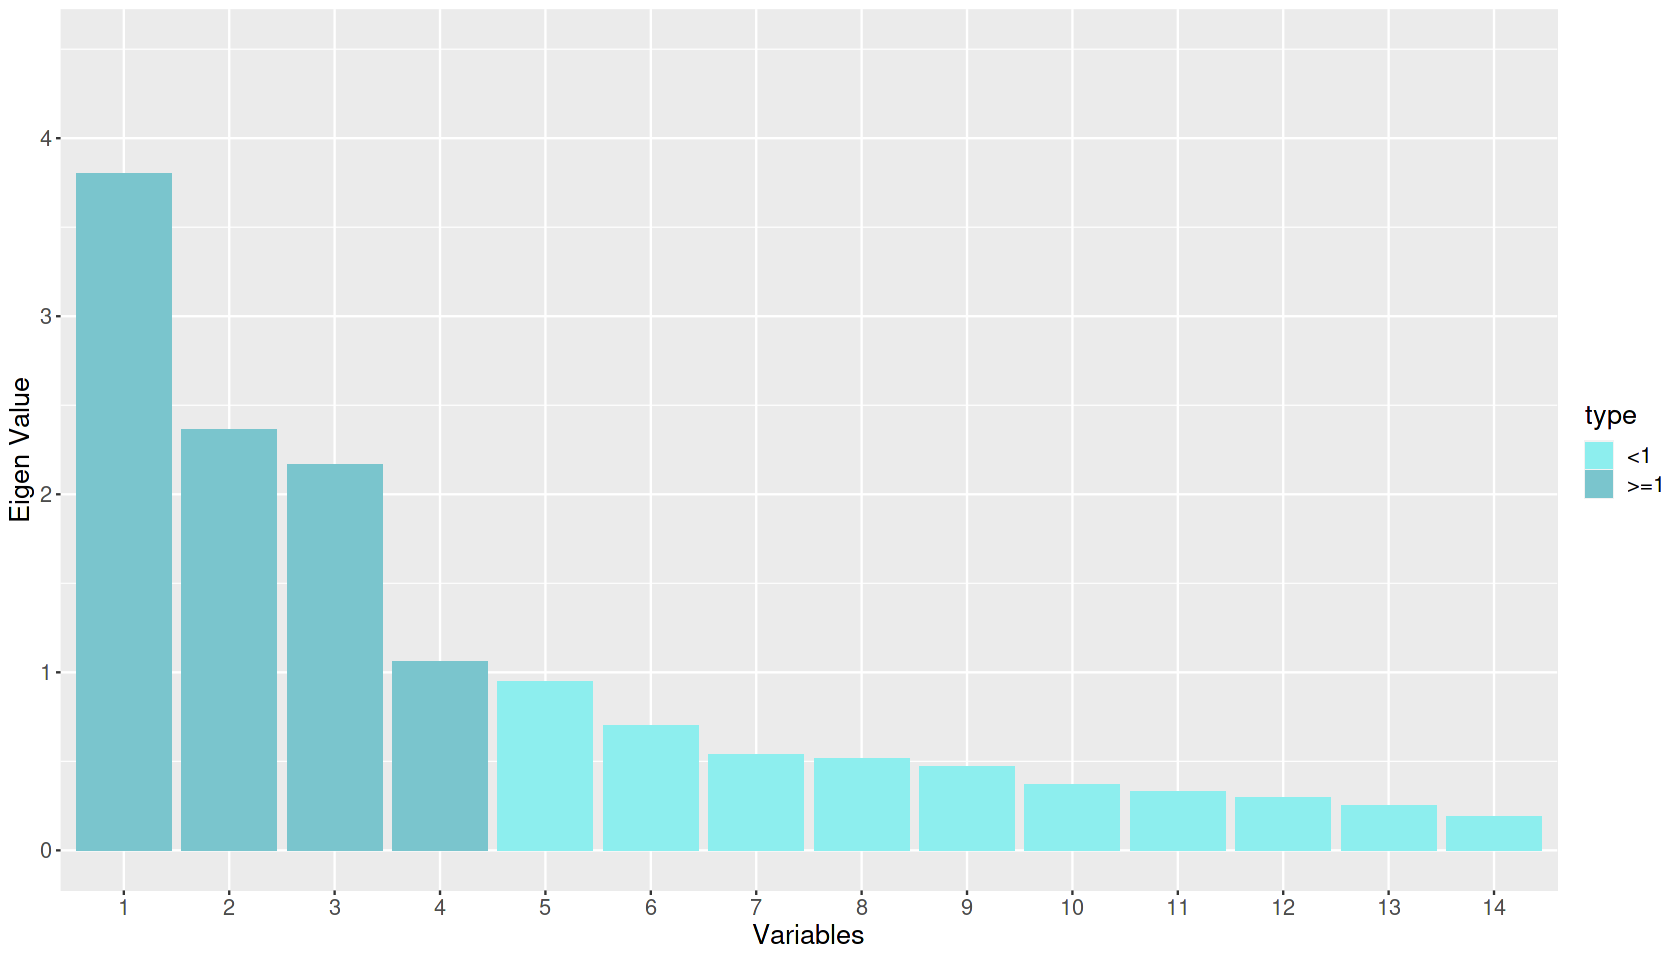

In [12]:
ds.eigen <- data.frame(eigen(ds_cor2)$values)
colnames(ds.eigen)<-"eigen_value"
ds.eigen$type <- ifelse(ds.eigen$`eigen_value`>=1,">=1","<1")

options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(ds.eigen, aes(x= reorder(rownames(ds.eigen),-`eigen_value`) ,y=`eigen_value`, fill=`type`))+
  geom_col()+
  labs(x="Variables", y="Eigen Value")+
  scale_fill_manual(values=c("darkslategray2", "cadetblue3"))+
  ylim(0,4.5)+
theme(text=element_text(size=16))

cat("\n Eigen values of variables with ev>=1: " , "\n \n", 
    ds.eigen$eigen_value[c(1,2,3,4)] , "\n \n",
    "Sum of eigen values where ev >1 : \n" , sum(ds.eigen$eigen_value[c(1,2,3,4)]), "\n ")

**Observation**

- Eigen value method indicates a possiblity of 4 factors (or latent variables)
- The sum of eigen values (where eigen value >=1) explains the variance of 9.3 variables.

**Scree plot**

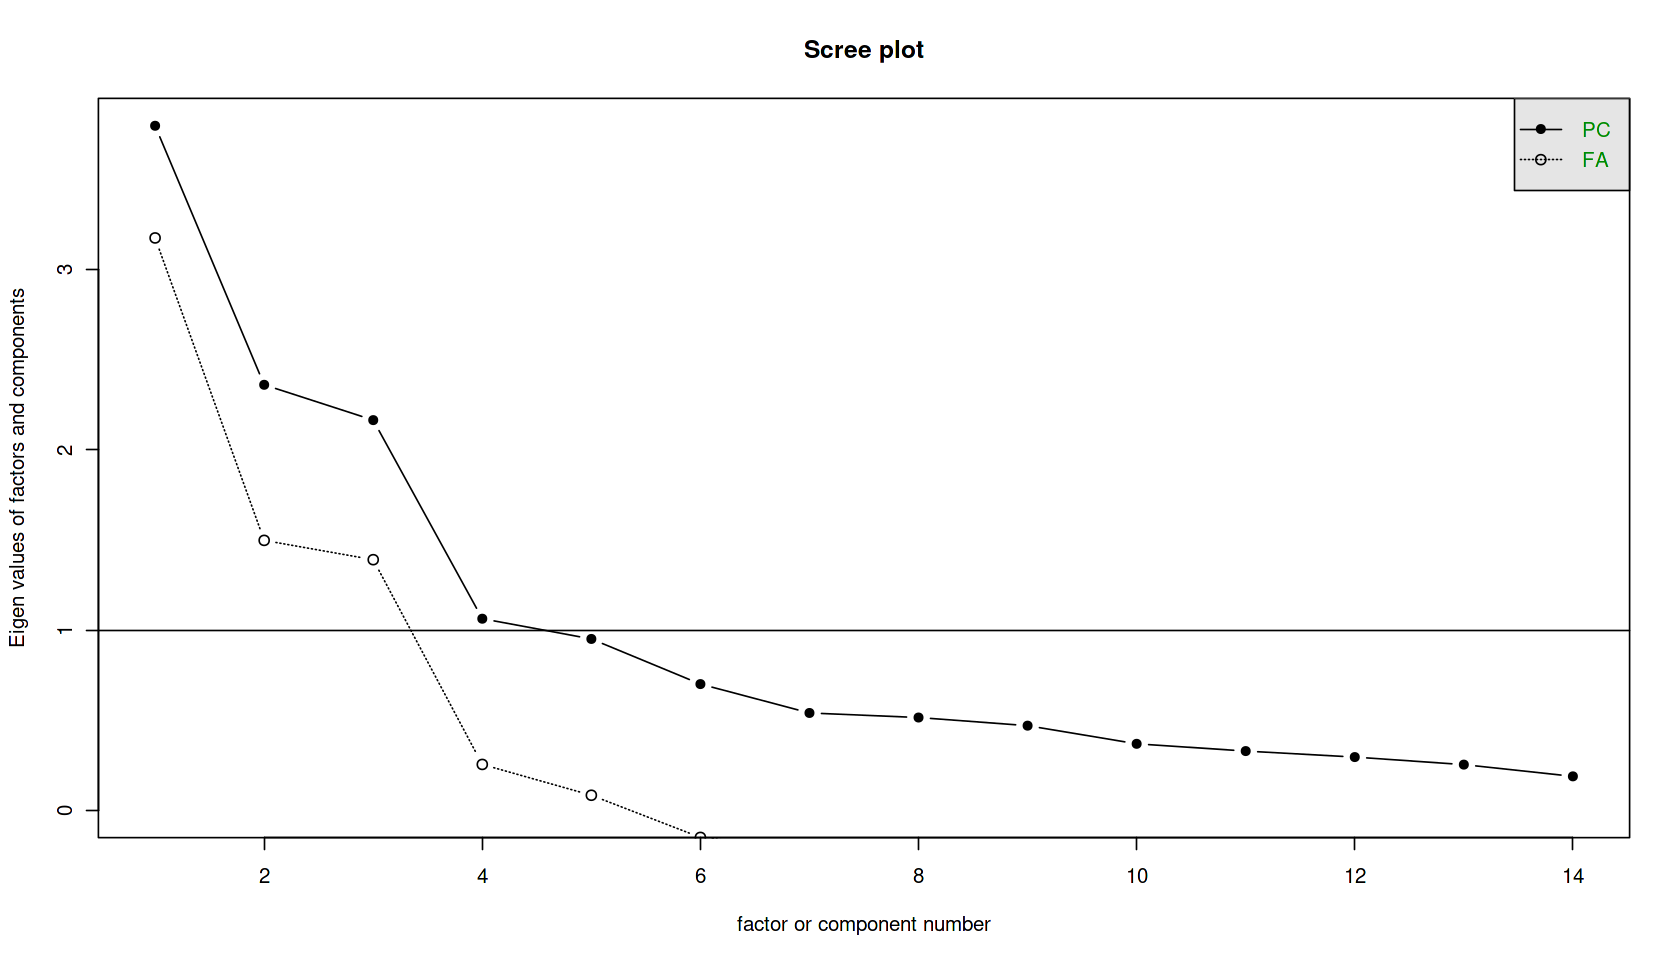

In [13]:
options(repr.plot.width = 14, repr.plot.height = 8)
scree(ds_cor2)

**Observation**

- Scree plot suggests 3 factors.

#### Step 3: Determining rotation (orthogonal or oblique)

- Orthogonal rotation (eg. varimax) should be used when the correlation between the factors is at least <0.3 (a general rule of thumb). Statistically, it is easier to interpret the results of orthogonally rotated factors because the factors are assumed to be uncorrelated. 

- Oblique rotation (eg. promax) should be used when the correlation between the factors is >0.3. Oblique rotation is less restrictive, i.e., they don't force factors to correlate but they allow it. In cases where factors are not distinct and load common variables, although it becomes complex to explain, may give a better explanation. 

Factor Analysis using method =  minres
Call: fa(r = ds_cor2, nfactors = 3, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
                                   MR1   MR2   MR3   h2   u2 com
Inflight.wifi.service             0.43  0.65 -0.10 0.62 0.38 1.8
Departure.Arrival.time.convenient 0.17  0.48 -0.01 0.26 0.74 1.2
Ease.of.Online.booking            0.32  0.87 -0.13 0.87 0.13 1.3
Gate.location                     0.11  0.49 -0.08 0.26 0.74 1.2
Food.and.drink                    0.58 -0.24 -0.42 0.57 0.43 2.2
Online.boarding                   0.47  0.20 -0.18 0.30 0.70 1.7
Seat.comfort                      0.65 -0.24 -0.39 0.63 0.37 1.9
Inflight.entertainment            0.84 -0.27 -0.05 0.77 0.23 1.2
On.board.service                  0.49 -0.05  0.51 0.50 0.50 2.0
Leg.room.service                  0.36  0.02  0.34 0.24 0.76 2.0
Baggage.handling                  0.47 -0.03  0.60 0.59 0.41 1.9
Checkin.service                   0.28 -0.04  0.15 0.10 0.9

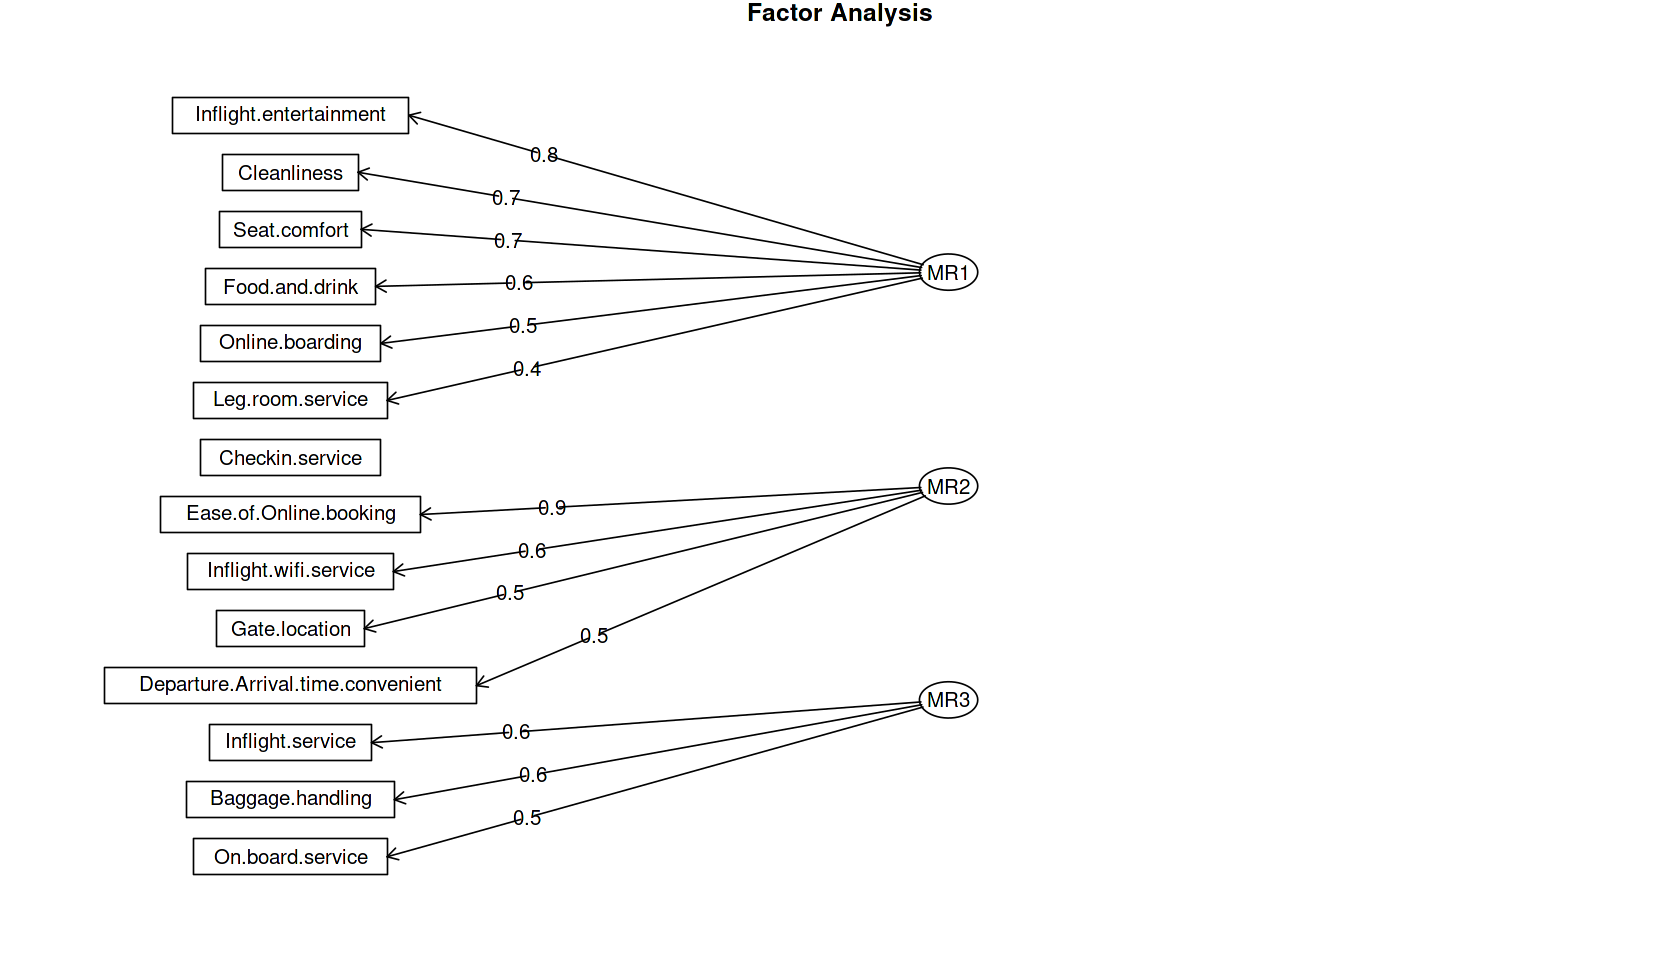

In [14]:
# No rotation 
ds.fa1 <- fa(ds_cor2, 3,rotate= "none")
ds.fa1
fa.diagram(ds.fa1)

**Observation: no rotation**

- with no rotation, you can see that the variables load onto more than 1 factor. For eg. , Inflight.service has loadings 0.48 and 0.64 for factors 1 and 3, respectively. 

- each factor loads at least 3 variables. 

- Cross loading is present

- To get a simple structure, i.e., variables loading distinctly onto 1 factor, I'd like to see the results after applying a rotation technique. 

Factor Analysis using method =  minres
Call: fa(r = ds_cor2, nfactors = 3, rotate = "promax")
Standardized loadings (pattern matrix) based upon correlation matrix
                                    MR1   MR3   MR2   h2   u2 com
Inflight.wifi.service              0.10  0.06  0.75 0.62 0.38 1.0
Departure.Arrival.time.convenient -0.08  0.04  0.51 0.26 0.74 1.1
Ease.of.Online.booking            -0.04 -0.04  0.95 0.87 0.13 1.0
Gate.location                     -0.07 -0.06  0.52 0.26 0.74 1.1
Food.and.drink                     0.80 -0.13 -0.06 0.57 0.43 1.1
Online.boarding                    0.37  0.02  0.33 0.30 0.70 2.0
Seat.comfort                       0.82 -0.07 -0.04 0.63 0.37 1.0
Inflight.entertainment             0.71  0.35 -0.08 0.77 0.23 1.5
On.board.service                  -0.03  0.72 -0.02 0.50 0.50 1.0
Leg.room.service                  -0.01  0.49  0.05 0.24 0.76 1.0
Baggage.handling                  -0.11  0.80 -0.02 0.59 0.41 1.0
Checkin.service                    0.10  0.27

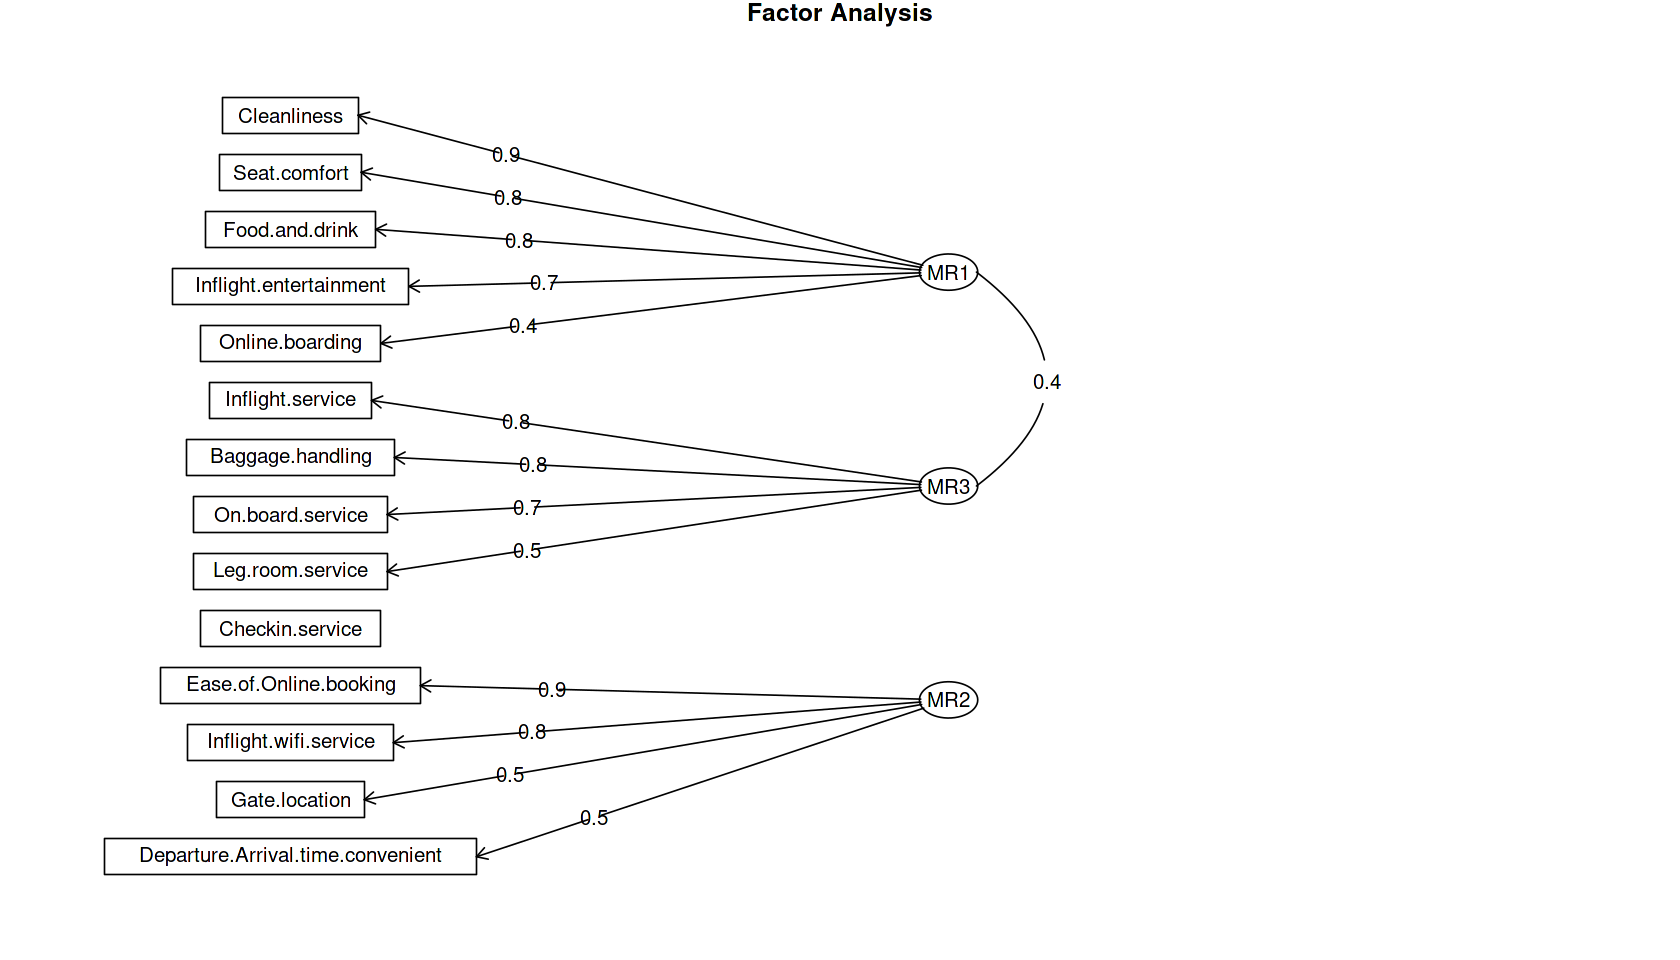

In [15]:
# Oblique (promax) rotation 
options(repr.plot.width = 14, repr.plot.height = 8)
ds.fa2 <- fa(ds_cor2, 3,rotate="promax")
ds.fa2
fa.diagram(ds.fa2)

**Observation: Oblique (promax) rotation**

- Factors 1 and 3 have a correlation of 0.35 

- Factor 2 does not have high correlation with factors 1 and 3

- Since the factors are not highly correlated to one another, promax is not the ideal choice of rotation. Thus, we can move to orthogonal rotation 

Factor Analysis using method =  minres
Call: fa(r = ds_cor2, nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
                                    MR1   MR3  MR2   h2   u2 com
Inflight.wifi.service              0.17  0.13 0.76 0.62 0.38 1.2
Departure.Arrival.time.convenient -0.03  0.06 0.50 0.26 0.74 1.0
Ease.of.Online.booking             0.03  0.02 0.93 0.87 0.13 1.0
Gate.location                     -0.03 -0.03 0.50 0.26 0.74 1.0
Food.and.drink                     0.75  0.01 0.01 0.57 0.43 1.0
Online.boarding                    0.40  0.11 0.36 0.30 0.70 2.2
Seat.comfort                       0.79  0.08 0.03 0.63 0.37 1.0
Inflight.entertainment             0.75  0.47 0.01 0.77 0.23 1.7
On.board.service                   0.09  0.70 0.03 0.50 0.50 1.0
Leg.room.service                   0.07  0.48 0.08 0.24 0.76 1.1
Baggage.handling                   0.02  0.76 0.03 0.59 0.41 1.0
Checkin.service                    0.14  0.28 0.03 0.10 

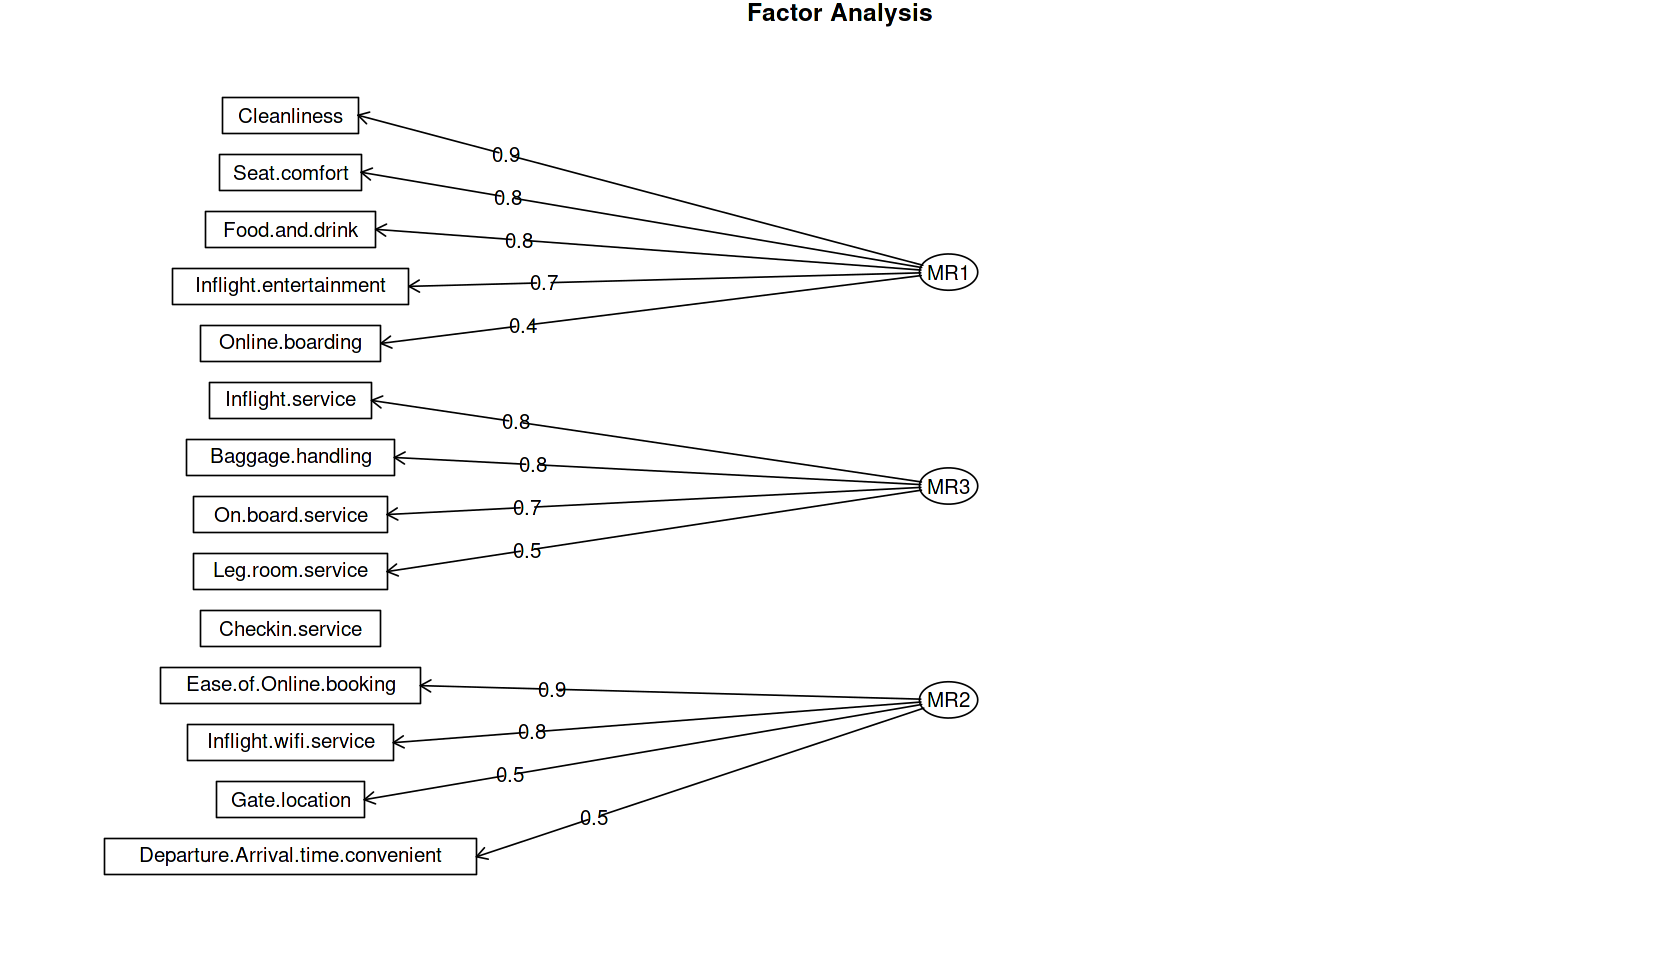

In [16]:
# Orthogonal (varimax) rotation
options(repr.plot.width = 14, repr.plot.height = 8)
ds.fa3 <- fa(ds_cor2, 3, rotate = "varimax")
ds.fa3
fa.diagram(ds.fa3)

**Observation: Orthogonal (varimax) rotation**

- Each factor loads at least 4 variables- this is a positive indication for retaining the factors

- Only check-in service did not load onto any factor

- The loading for each variable onto the factor that it loads is atleast 0.3 (cutoff). 

Now let's take a closer look at the loadings. 

In [17]:
print(ds.fa3$loadings, cutoff = 0.3)


Loadings:
                                  MR1    MR3    MR2   
Inflight.wifi.service                            0.758
Departure.Arrival.time.convenient                0.501
Ease.of.Online.booking                           0.933
Gate.location                                    0.504
Food.and.drink                     0.753              
Online.boarding                    0.395         0.359
Seat.comfort                       0.790              
Inflight.entertainment             0.746  0.467       
On.board.service                          0.701       
Leg.room.service                          0.481       
Baggage.handling                          0.765       
Checkin.service                                       
Inflight.service                          0.800       
Cleanliness                        0.858              

                 MR1   MR3   MR2
SS loadings    2.707 2.295 2.089
Proportion Var 0.193 0.164 0.149
Cumulative Var 0.193 0.357 0.507


**Observation**

- Factor 1: food and drink,seat comfort, inflight entertainment, cleanliness

- Factor 2: inflight wifi, departure arrival time convenience, online booking ease, gate location

- Factor 3: on board service, leg room service, baggage handling, inflight services
- online boarding is a low-contribution variable so I chose to leave it out of the factors

Let's check how reliable the factors are using Cronbach's alpha.

#### Reliability of factors using Cronbach's alpha

- to do this, first the factors have to be grouped together

In [18]:
install.packages("ltm")
library(ltm)
factor1 <- ds_cor2[, c("Food.and.drink", "Seat.comfort", "Inflight.entertainment", "Cleanliness")]
factor2 <- ds_cor2[,c("Inflight.wifi.service","Departure.Arrival.time.convenient", "Ease.of.Online.booking","Gate.location")]
factor3 <- ds_cor2[,c("Inflight.entertainment", "On.board.service","Leg.room.service","Baggage.handling","Inflight.service" )]
cronbach.alpha(factor1)
cronbach.alpha(factor2)
cronbach.alpha(factor3)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: msm

Loading required package: polycor


Attaching package: ‘polycor’


The following object is masked from ‘package:psych’:

    polyserial



Attaching package: ‘ltm’


The following object is masked from ‘package:psych’:

    factor.scores





Cronbach's alpha for the 'factor1' data-set

Items: 4
Sample units: 14
alpha: 0.954



Cronbach's alpha for the 'factor2' data-set

Items: 4
Sample units: 14
alpha: 0.879



Cronbach's alpha for the 'factor3' data-set

Items: 5
Sample units: 14
alpha: 0.828


**Observation**

- the Cronbach's alpha for each factor is more than 0.80. This indicates a good level of factor reliability.

_Caution: Cronbach's alpha > 0.95 could hint to redundancy_ 

<a id="6"></a> <br>
### Exploratory Factor Analysis Interpretation

Based on the variables in the the factors, I interpret the latent variables as:

- Factor 1 - Comfort (food and drink, seat comfort, inflight entertainment, and cleanliness) 

- Factor 2 - Convenience (inflight wifi service,Departure and arrival time, ease of online booking, gate location)

- Factor 3 - Services (entertainment, on board service, leg room service, baggage handling, inflight service)

<a id="7"></a> <br>
### Logistic Regression

The dependent variable in the dataset is binary ("neutral or dissatisfied" and "satisfied"). Therefore, it is fitting to use logistic regression.

In [19]:
install.packages(c("caret","broom","MASS","ROCR"))
library(MASS)
library(ROCR)
library(broom)
library(caret)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




Before building the logistic regression model, we have to make sure the dataset is ready. To do that:

- First, check if there is a satisfaction imbalance in the DV 

- Next, the DV which should be categotical 

In [20]:
table(ds$satisfaction)
str(ds)


neutral or dissatisfied               satisfied 
                  58879                   45025 

'data.frame':	103904 obs. of  24 variables:
 $ id                               : int  70172 5047 110028 24026 119299 111157 82113 96462 79485 65725 ...
 $ Gender                           : chr  "Male" "Male" "Female" "Female" ...
 $ Customer.Type                    : chr  "Loyal Customer" "disloyal Customer" "Loyal Customer" "Loyal Customer" ...
 $ Age                              : int  13 25 26 25 61 26 47 52 41 20 ...
 $ Type.of.Travel                   : chr  "Personal Travel" "Business travel" "Business travel" "Business travel" ...
 $ Class                            : chr  "Eco Plus" "Business" "Business" "Business" ...
 $ Flight.Distance                  : int  460 235 1142 562 214 1180 1276 2035 853 1061 ...
 $ Inflight.wifi.service            : int  3 3 2 2 3 3 2 4 1 3 ...
 $ Departure.Arrival.time.convenient: int  4 2 2 5 3 4 4 3 2 3 ...
 $ Ease.of.Online.booking           : int  3 3 2 5 3 2 2 4 2 3 ...
 $ Gate.location                    : int  1 3 2 5 3 1 3 4 2 4 ...
 $ 

- The ratio is not 1:2 so we can work with the current balance.

- I decided to not only convert the datatype of satisfaction from character to factor but also to change the column to binary.
Hence, 1 corresponds to satisfied and 0 corresponds to neutral or dissatisfied. 
- I will change all ordinal variables to factors

In [21]:
ds <- read.csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
ds <- subset(ds, select=-c(id,X))
ds$Departure.Delay.in.Minutes = as.numeric(ds$Departure.Delay.in.Minutes)
ds$Arrival.Delay.in.Minutes[is.na(ds$Arrival.Delay.in.Minutes)] <-0

ds$satisfaction <- ifelse(ds$satisfaction=="satisfied",1,0)
ds$satisfaction <- factor(ds$satisfaction, levels = c(0, 1))

ds$Gender <- as.factor(ds$Gender)
ds$Customer.Type <- as.factor(ds$Customer.Type)
ds$Type.of.Travel <- as.factor(ds$Type.of.Travel)
ds$Class <- as.factor(ds$Class)
ds$Inflight.wifi.service <- as.factor(ds$Inflight.wifi.service)
ds$Departure.Arrival.time.convenient <- as.factor(ds$Departure.Arrival.time.convenient)
ds$Ease.of.Online.booking <- as.factor(ds$Ease.of.Online.booking)
ds$Gate.location <- as.factor(ds$Gate.location)
ds$Food.and.drink <- as.factor(ds$Food.and.drink)
ds$Online.boarding <- as.factor(ds$Online.boarding)
ds$Seat.comfort <- as.factor(ds$Seat.comfort)
ds$Leg.room.service <- as.factor(ds$Leg.room.service)
ds$Inflight.entertainment <- as.factor(ds$Inflight.entertainment)
ds$On.board.service <- as.factor(ds$On.board.service)
ds$Checkin.service <- as.factor(ds$Checkin.service)
ds$Inflight.service <- as.factor(ds$Inflight.service)
ds$Cleanliness <- as.factor(ds$Cleanliness)
ds$Baggage.handling <- as.factor(ds$Baggage.handling)
  
str(ds)

'data.frame':	103904 obs. of  23 variables:
 $ Gender                           : Factor w/ 2 levels "Female","Male": 2 2 1 1 2 1 2 1 1 2 ...
 $ Customer.Type                    : Factor w/ 2 levels "disloyal Customer",..: 2 1 2 2 2 2 2 2 2 1 ...
 $ Age                              : int  13 25 26 25 61 26 47 52 41 20 ...
 $ Type.of.Travel                   : Factor w/ 2 levels "Business travel",..: 2 1 1 1 1 2 2 1 1 1 ...
 $ Class                            : Factor w/ 3 levels "Business","Eco",..: 3 1 1 1 1 2 2 1 1 2 ...
 $ Flight.Distance                  : int  460 235 1142 562 214 1180 1276 2035 853 1061 ...
 $ Inflight.wifi.service            : Factor w/ 6 levels "0","1","2","3",..: 4 4 3 3 4 4 3 5 2 4 ...
 $ Departure.Arrival.time.convenient: Factor w/ 6 levels "0","1","2","3",..: 5 3 3 6 4 5 5 4 3 4 ...
 $ Ease.of.Online.booking           : Factor w/ 6 levels "0","1","2","3",..: 4 4 3 6 4 3 3 5 3 4 ...
 $ Gate.location                    : Factor w/ 6 levels "0","1","2","3",..:

Let's build the logistic regression model with all variables (Model 1)

In [22]:
set.seed(123)
model1 <- glm(satisfaction ~ Gender + Customer.Type + Age + 
                 
                 Type.of.Travel + Class + Flight.Distance + Inflight.wifi.service +
                
                 Departure.Arrival.time.convenient + Ease.of.Online.booking + 
                 Gate.location + Food.and.drink + Online.boarding + Seat.comfort +
                 Inflight.entertainment + On.board.service + Leg.room.service +
                 Baggage.handling + Checkin.service + Inflight.service +
                 Cleanliness 
               + Departure.Delay.in.Minutes + Arrival.Delay.in.Minutes , 
               data = ds, family = "binomial")
summary(model1)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = satisfaction ~ Gender + Customer.Type + Age + Type.of.Travel + 
    Class + Flight.Distance + Inflight.wifi.service + Departure.Arrival.time.convenient + 
    Ease.of.Online.booking + Gate.location + Food.and.drink + 
    Online.boarding + Seat.comfort + Inflight.entertainment + 
    On.board.service + Leg.room.service + Baggage.handling + 
    Checkin.service + Inflight.service + Cleanliness + Departure.Delay.in.Minutes + 
    Arrival.Delay.in.Minutes, family = "binomial", data = ds)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.6962  -0.2131  -0.0471   0.1327   4.4049  

Coefficients: (3 not defined because of singularities)
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                         6.153e+00  9.961e+03   0.001 0.999507    
GenderMale                          4.650e-02  2.730e-02   1.703 0.088498 .  
Customer.TypeLoyal Customer         3.354e+00  4.953e-02  67.718  < 2e-16 ***
Age    

**Observations**

- The AIC of Model 1 is 37156

- Variables like gender, flight distance, inflight wifi service, gate location, food and drinks, seat comfort, inflight entertainment, onboard services, legroom service are not significant. 

Let's create a model with significant variables only (Model 2)

In [23]:
set.seed(123)
model2 <- glm(satisfaction ~ Customer.Type + Age + 
                 
                 Type.of.Travel + Class +
                 Departure.Arrival.time.convenient + Ease.of.Online.booking + 
                 Online.boarding + Seat.comfort +
                 Inflight.entertainment + On.board.service + Leg.room.service +
                 Baggage.handling + Checkin.service + Inflight.service +Cleanliness +
                 Departure.Delay.in.Minutes + Arrival.Delay.in.Minutes , 
               data = ds, family = "binomial")
summary(model2)


Call:
glm(formula = satisfaction ~ Customer.Type + Age + Type.of.Travel + 
    Class + Departure.Arrival.time.convenient + Ease.of.Online.booking + 
    Online.boarding + Seat.comfort + Inflight.entertainment + 
    On.board.service + Leg.room.service + Baggage.handling + 
    Checkin.service + Inflight.service + Cleanliness + Departure.Delay.in.Minutes + 
    Arrival.Delay.in.Minutes, family = "binomial", data = ds)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3397  -0.3204  -0.0753   0.2283   4.4552  

Coefficients: (3 not defined because of singularities)
                                     Estimate Std. Error z value Pr(>|z|)    
(Intercept)                        -2.648e+01  3.657e+02  -0.072   0.9423    
Customer.TypeLoyal Customer         2.610e+00  3.753e-02  69.546  < 2e-16 ***
Age                                -6.129e-03  8.406e-04  -7.291 3.09e-13 ***
Type.of.TravelPersonal Travel      -3.615e+00  4.080e-02 -88.604  < 2e-16 ***
ClassEco          

**Observations**

- The AIC of Model 1 is 50406 which is higher than Model 1. Therefore,we'll keep using Model 1 for prediction. 

### ANOVA test

To be more sure, I'd like to compare the two models using ANOVA test. My NULL hypothesis (H0) is that Model 1 is better than Model 2. Therefore, if p < 0.05, the NULL hypothesis will be rejected , suggesting Model 1 is better. 

In [24]:
anova(model1, model2, test="Chisq")

,Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,103828,37004.13,NA,NA,NA
2,103845,50288.10,-17,-13283.97,0


**Observations**

- The p-value is <0.05 which is significant. Thus, H0 is thus rejected, and Model 1 is confirmed to be better than Model 2. 

<a id="8"></a> <br>
### Prediction on Test Data 

Okay, now that the trained model is ready, its time to test Model 1 on the test dataset. 

**Step 1**

- Read and process test dataset

In [25]:
ds_test <- read.csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

ds_test <- subset(ds_test, select=-c(id,X))
ds_test$Departure.Delay.in.Minutes = as.numeric(ds_test$Departure.Delay.in.Minutes)
ds_test$Arrival.Delay.in.Minutes[is.na(ds_test$Arrival.Delay.in.Minutes)] <-0

ds_test$satisfaction <- ifelse(ds_test$satisfaction=="satisfied",1,0)
ds_test$satisfaction <- factor(ds_test$satisfaction, levels = c(0, 1))

ds_test$Gender <- as.factor(ds_test$Gender)
ds_test$Customer.Type <- as.factor(ds_test$Customer.Type)
ds_test$Type.of.Travel <- as.factor(ds_test$Type.of.Travel)
ds_test$Class <- as.factor(ds_test$Class)
ds_test$Inflight.wifi.service <- as.factor(ds_test$Inflight.wifi.service)
ds_test$Departure.Arrival.time.convenient <- as.factor(ds_test$Departure.Arrival.time.convenient)
ds_test$Ease.of.Online.booking <- as.factor(ds_test$Ease.of.Online.booking)
ds_test$Gate.location <- as.factor(ds_test$Gate.location)
ds_test$Food.and.drink <- as.factor(ds_test$Food.and.drink)
ds_test$Online.boarding <- as.factor(ds_test$Online.boarding)
ds_test$Seat.comfort <- as.factor(ds_test$Seat.comfort)
ds_test$Leg.room.service <- as.factor(ds_test$Leg.room.service)
ds_test$Inflight.entertainment <- as.factor(ds_test$Inflight.entertainment)
ds_test$On.board.service <- as.factor(ds_test$On.board.service)
ds_test$Checkin.service <- as.factor(ds_test$Checkin.service)
ds_test$Inflight.service <- as.factor(ds_test$Inflight.service)
ds_test$Cleanliness <- as.factor(ds_test$Cleanliness)
ds_test$Baggage.handling <- as.factor(ds_test$Baggage.handling)
  
str(ds_test)

'data.frame':	25976 obs. of  23 variables:
 $ Gender                           : Factor w/ 2 levels "Female","Male": 1 1 2 2 1 2 1 1 2 1 ...
 $ Customer.Type                    : Factor w/ 2 levels "disloyal Customer",..: 2 2 1 2 2 2 2 2 2 2 ...
 $ Age                              : int  52 36 20 44 49 16 77 43 47 46 ...
 $ Type.of.Travel                   : Factor w/ 2 levels "Business travel",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Class                            : Factor w/ 3 levels "Business","Eco",..: 2 1 2 1 2 2 1 1 2 1 ...
 $ Flight.Distance                  : int  160 2863 192 3377 1182 311 3987 2556 556 1744 ...
 $ Inflight.wifi.service            : Factor w/ 6 levels "0","1","2","3",..: 6 2 3 1 3 4 6 3 6 3 ...
 $ Departure.Arrival.time.convenient: Factor w/ 6 levels "0","1","2","3",..: 5 2 1 1 4 4 6 3 3 3 ...
 $ Ease.of.Online.booking           : Factor w/ 6 levels "0","1","2","3",..: 4 4 3 1 5 4 6 3 3 3 ...
 $ Gate.location                    : Factor w/ 5 levels "1","2","3","4",..:

In [26]:
summary(ds_test)

    Gender                Customer.Type        Age       
 Female:13172   disloyal Customer: 4799   Min.   : 7.00  
 Male  :12804   Loyal Customer   :21177   1st Qu.:27.00  
                                          Median :40.00  
                                          Mean   :39.62  
                                          3rd Qu.:51.00  
                                          Max.   :85.00  
         Type.of.Travel       Class       Flight.Distance Inflight.wifi.service
 Business travel:18038   Business:12495   Min.   :  31    0: 813               
 Personal Travel: 7938   Eco     :11564   1st Qu.: 414    1:4488               
                         Eco Plus: 1917   Median : 849    2:6490               
                                          Mean   :1194    3:6317               
                                          3rd Qu.:1744    4:4981               
                                          Max.   :4983    5:2887               
 Departure.Arrival.time.convenient

**Step 2**

- Run prediction on it

In [27]:
pred <- predict(model1, type = "response", newdata = ds_test)
summary(pred)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01021 0.19479 0.43881 0.97520 1.00000 

**Step 3**

- Find out the accuracy, sensitivity, AUC ROC, etc. of the prediction. We will find out how reliable the logistic regression model is, and how accurately it makes predictions. 

- Unlike linear regression, R-squared value is not present in logistic regression that can explain the proportion of variance in the DV caused by the IVs 

**AUC-ROC**

[1] The AUC ROC value is : 

[1] 0.9791554

[1] The threshold value for cutoff from the ROC curve appears to be 0.7 

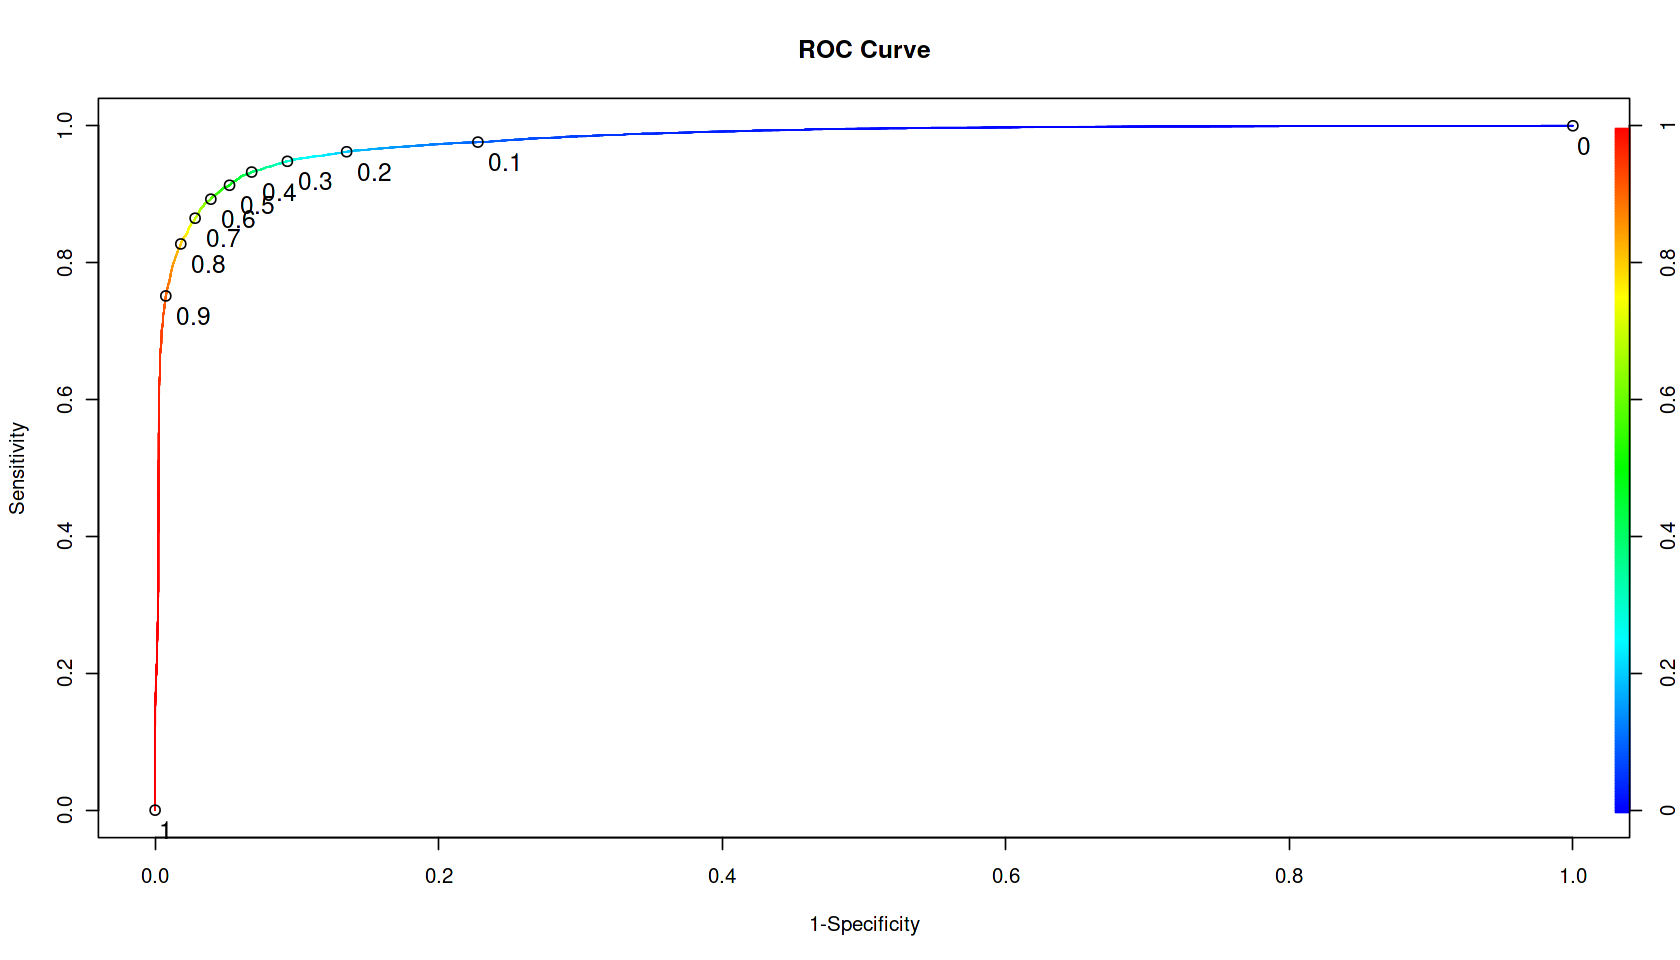

In [28]:
# ROC plot (sensitivity versus specificity)
ROC_pred <- prediction(pred, ds_test$satisfaction)
ROC_perf<- performance(ROC_pred, measure = "tpr", x.measure = "fpr")
options(repr.plot.width = 14, repr.plot.height = 8)
plot(ROC_perf, colorize=TRUE, print.cutoffs.at=seq(0,1,by =0.1), text.adj=c(-0.3,1.6), text.cex = 1.2 , main="ROC Curve", xlab="1-Specificity", ylab="Sensitivity")

# AUC of ROC plot
auc <- as.numeric(performance(ROC_pred, measure = "auc")@y.values)
noquote("The AUC ROC value is : ")
auc
noquote("The threshold value for cutoff from the ROC curve appears to be 0.7 ")

**Confusion Matrix**

In [29]:
# Confusion matrix
confusion_matrix <- table(ds_test$satisfaction, pred>0.7)
row.names(confusion_matrix)<- c("neutral or dissatisfied", "satisfied")
noquote("Confusion Matrix")
confusion_matrix

[1] Confusion Matrix

                         
                          FALSE  TRUE
  neutral or dissatisfied 14162   411
  satisfied                1540  9863

**Observations**

The columns are predictions and the rows are actual values. The values are :

- True Negative (TN) = 14162

- False Negative (FN) = 411

- False Positive (FP) = 1540

- True Positive (TP) = 9863

Using the values of the confusion matrix, lets calculate other metrics. 

 - Accuracy (all correct / all) = TP + TN / total
 
 - Misclassification (all incorrect / all) = FP + FN / total
 
 - Precision (true positives / predicted positives) = TP / TP + FP
 
 - Sensitivity (true positives / all actual positives) = TP / TP + FN
 
 - Specificity (true negatives / all actual negatives) =TN / TN + FP

In [30]:
tp <- 9863
fp <- 1540
fn <- 411
tn <- 14162
noquote("Accuracy")
(tp+tn)/(tp+tn+fp+fn)
noquote("Misclassification")
(fp+fn)/(tp+tn+fp+fn)
noquote("Precision")
tp/(tp+fp)
noquote("Sensitivity")
tp/(tp+fn)
noquote("Specificity")
tn/(tn+fp)

[1] Accuracy

[1] 0.9248922

[1] Misclassification

[1] 0.07510779

[1] Precision

[1] 0.8649478

[1] Sensitivity

[1] 0.9599961

[1] Specificity

[1] 0.9019233

<a id="9"></a> <br>
### Results of Logistic Regression

- The model's prediction accuracy is 92% and misclassification is 7%. Both measures indicate reliability of the model.

- Precision is 86% , perhaps this needs to be improved.  

 - Logistic regression showed that for customer satisfaction, the following factors are significantly positively significant. This means when these variables increase, the probability of satisfaction increases. 
 
    1. Loyal customers
 
    2. Convenient departure and arrival time
 
    3. Ease of booking

- Increase in delay of flight arrival decreases the probability of satisfaction

Now that we know the high contribution variables from logistic regression and the latent variables from factor analysis, lets visualize them .

<a id="10"></a> <br>
### Visualizations

**Customer Ratings Distribution**

Warning message:
“attributes are not identical across measure variables;
they will be dropped”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


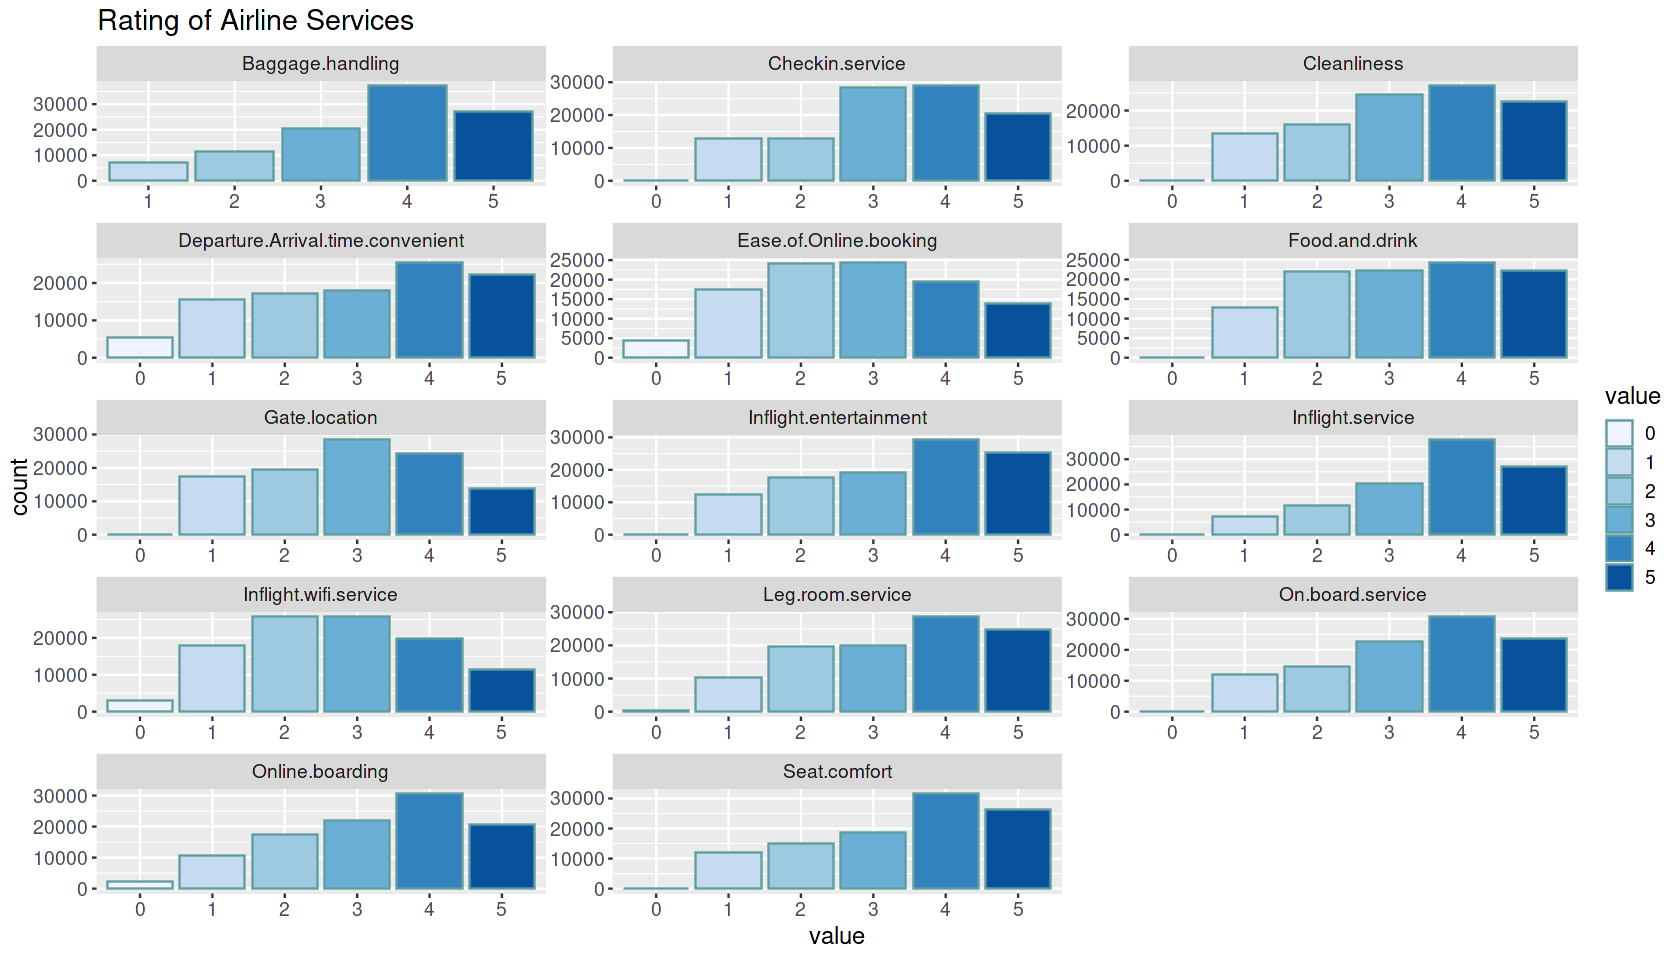

In [31]:
ds_rating <- subset(ds, select=c("Inflight.wifi.service", "Departure.Arrival.time.convenient","Ease.of.Online.booking", "Gate.location", "Food.and.drink", "Online.boarding", "Seat.comfort", "Inflight.entertainment", "On.board.service", "Leg.room.service", "Baggage.handling", "Checkin.service", "Inflight.service","Cleanliness"))
options(repr.plot.width = 14, repr.plot.height = 8)
ds_rating %>%
  keep(is.factor) %>%
  gather()%>%
  ggplot(aes(value, fill = value)) +
    facet_wrap(~ key, scales = "free", ncol=3) +
    geom_histogram(stat="count", col="cadetblue")+
  scale_fill_brewer(palette = "Blues")+
  labs(title="Rating of Airline Services")+
theme(text= element_text(size=14))

**Categorical Variables**

Warning message:
“attributes are not identical across measure variables;
they will be dropped”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


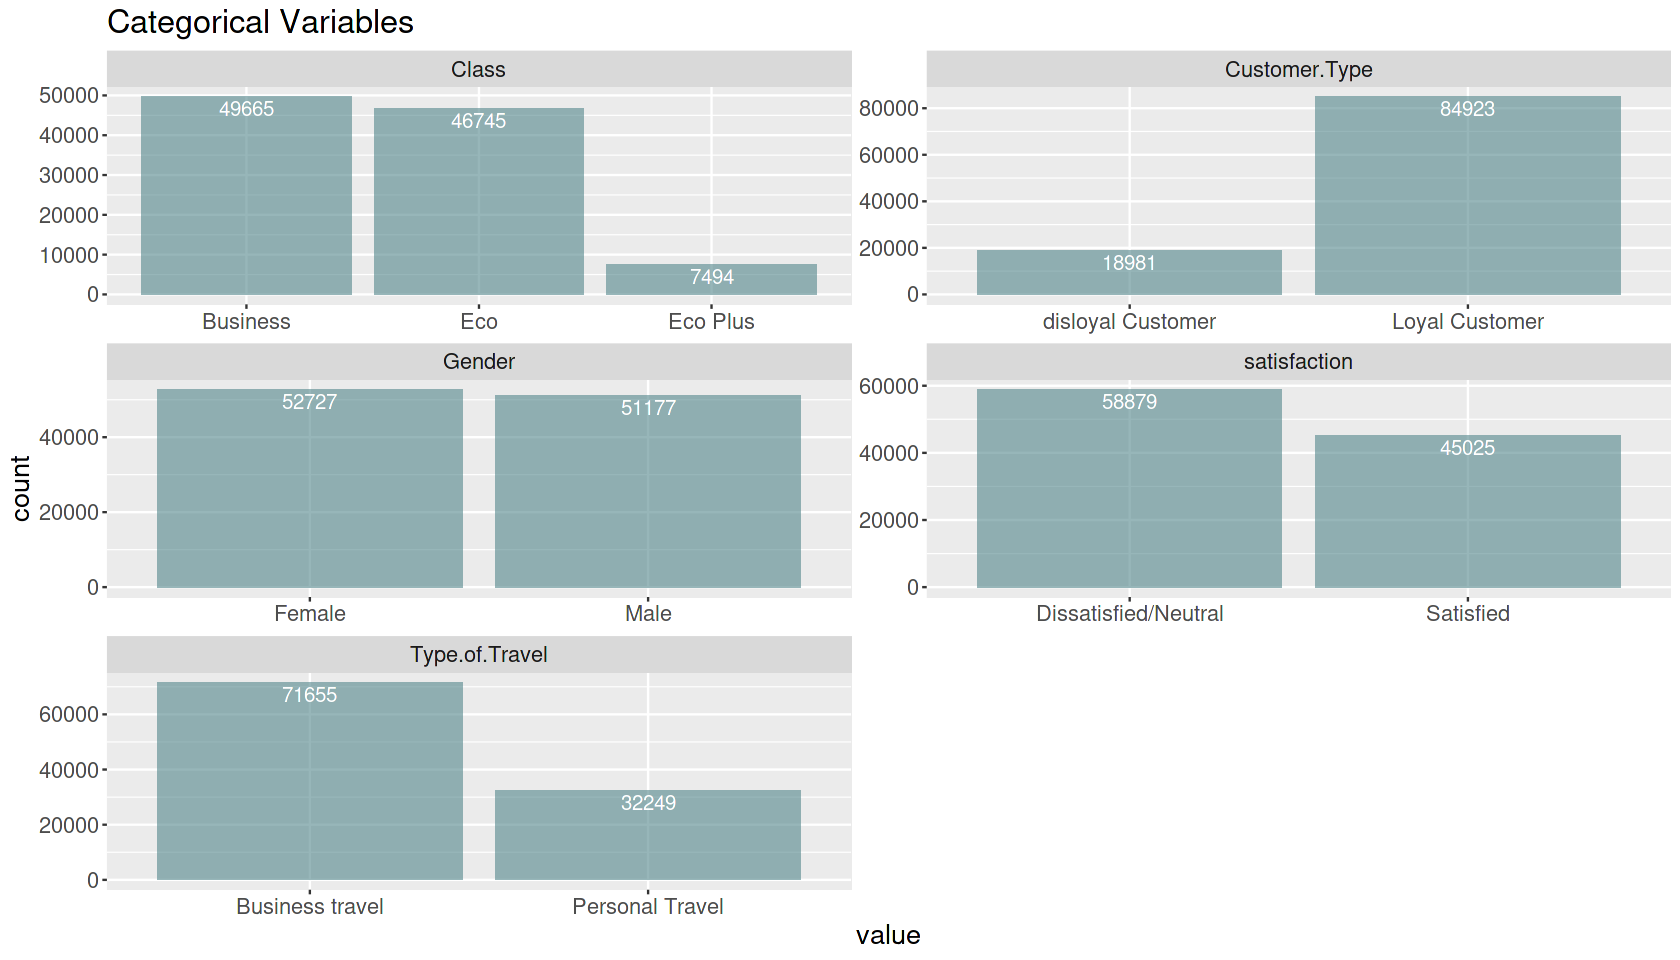

In [32]:
ds_cat <- subset(ds, select= c("Gender", "Customer.Type","Type.of.Travel","Class","satisfaction"))
ds_cat$satisfaction <- ifelse(ds_cat$satisfaction ==1,"Satisfied","Dissatisfied/Neutral")
ds_cat$satisfaction <- as.factor(ds_cat$satisfaction)
options(repr.plot.width = 14, repr.plot.height = 8)
ds_cat %>%
  keep(is.factor)%>%
  gather()%>%
  ggplot(aes(value))+
  geom_histogram(stat="count", fill="cadetblue4", alpha=0.6)+
  facet_wrap(~key, ncol=2,scales="free")+
  labs(title="Categorical Variables")+
  stat_count(aes(y=..count..,label=..count..), geom="text", vjust=1.3,size=4.2,color="white")+
theme(text= element_text(size=16))

**Observations**

- The gender ratio is quite balanced with almost equal numbers of male and female passengers

- Loyal customers are much higher in number than disloyal customers

- While the difference is not too high, more passengers are dissatisfied or neutral than satisfied

- Passengers who travel for business are more than the double of personal travel passengers. This explains why maximum passengers go for business class. 

**Customer Loyalty and Satisfaction**

Do loyal customers report satisfaction more than disloyal customers?

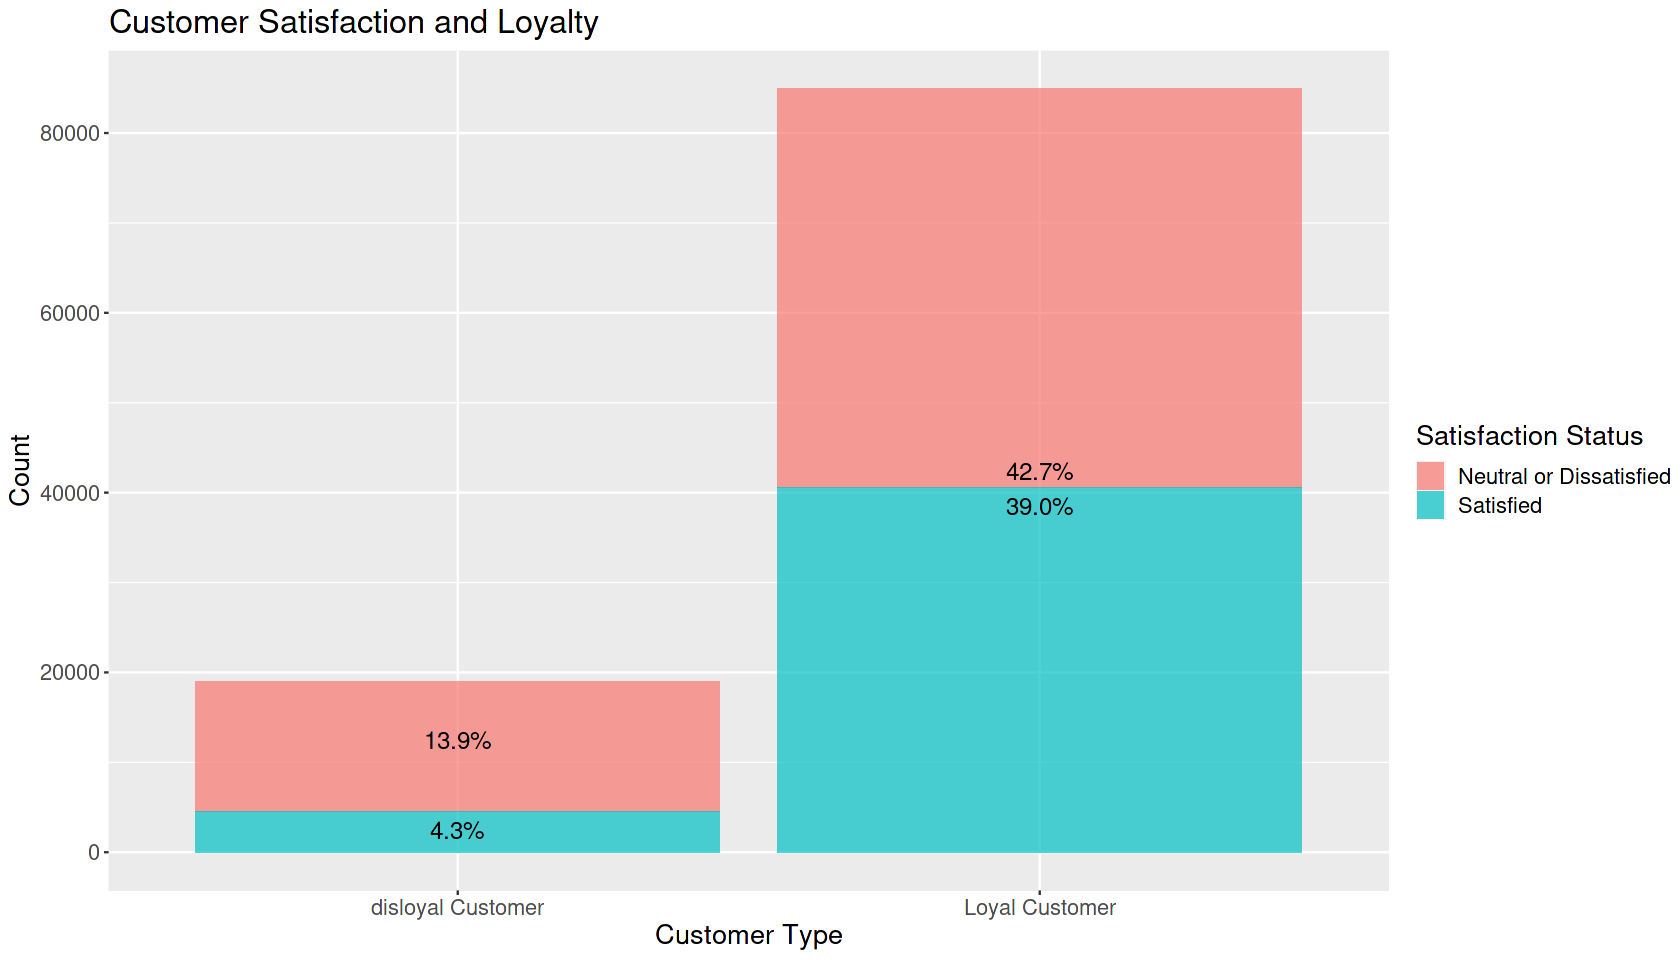

In [33]:
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(ds, aes(x=`Customer.Type`, fill = `satisfaction`))+
  geom_bar(alpha=0.7)+
  geom_text(aes(label= scales::percent((..count..)/sum(..count..))), stat="count",
        vjust = 1.5, size=5)+
  scale_fill_discrete(name = "Satisfaction Status", labels=c("Neutral or Dissatisfied", "Satisfied"))+
  labs(x="Customer Type", y="Count", title="Customer Satisfaction and Loyalty ")+
  theme(legend.position="right",text= element_text(size=16) )

**Observation**

- 39 % loyal customers are satisfied and 42.7 % loyal customers are dissatisfied / neutral. 

- A greater % of disloyal customers (13.9 %) are dissatisfied / neutral compared to disloyal and satisfied customers (4.3 %)

**Convenience of Arrival/Departure and Satisfaction**
With increasing conveneince of arrival/departure time, the number of satisfied customers should gradually increase with the rating. The opposite trend should be observed for dissatisfied customers.

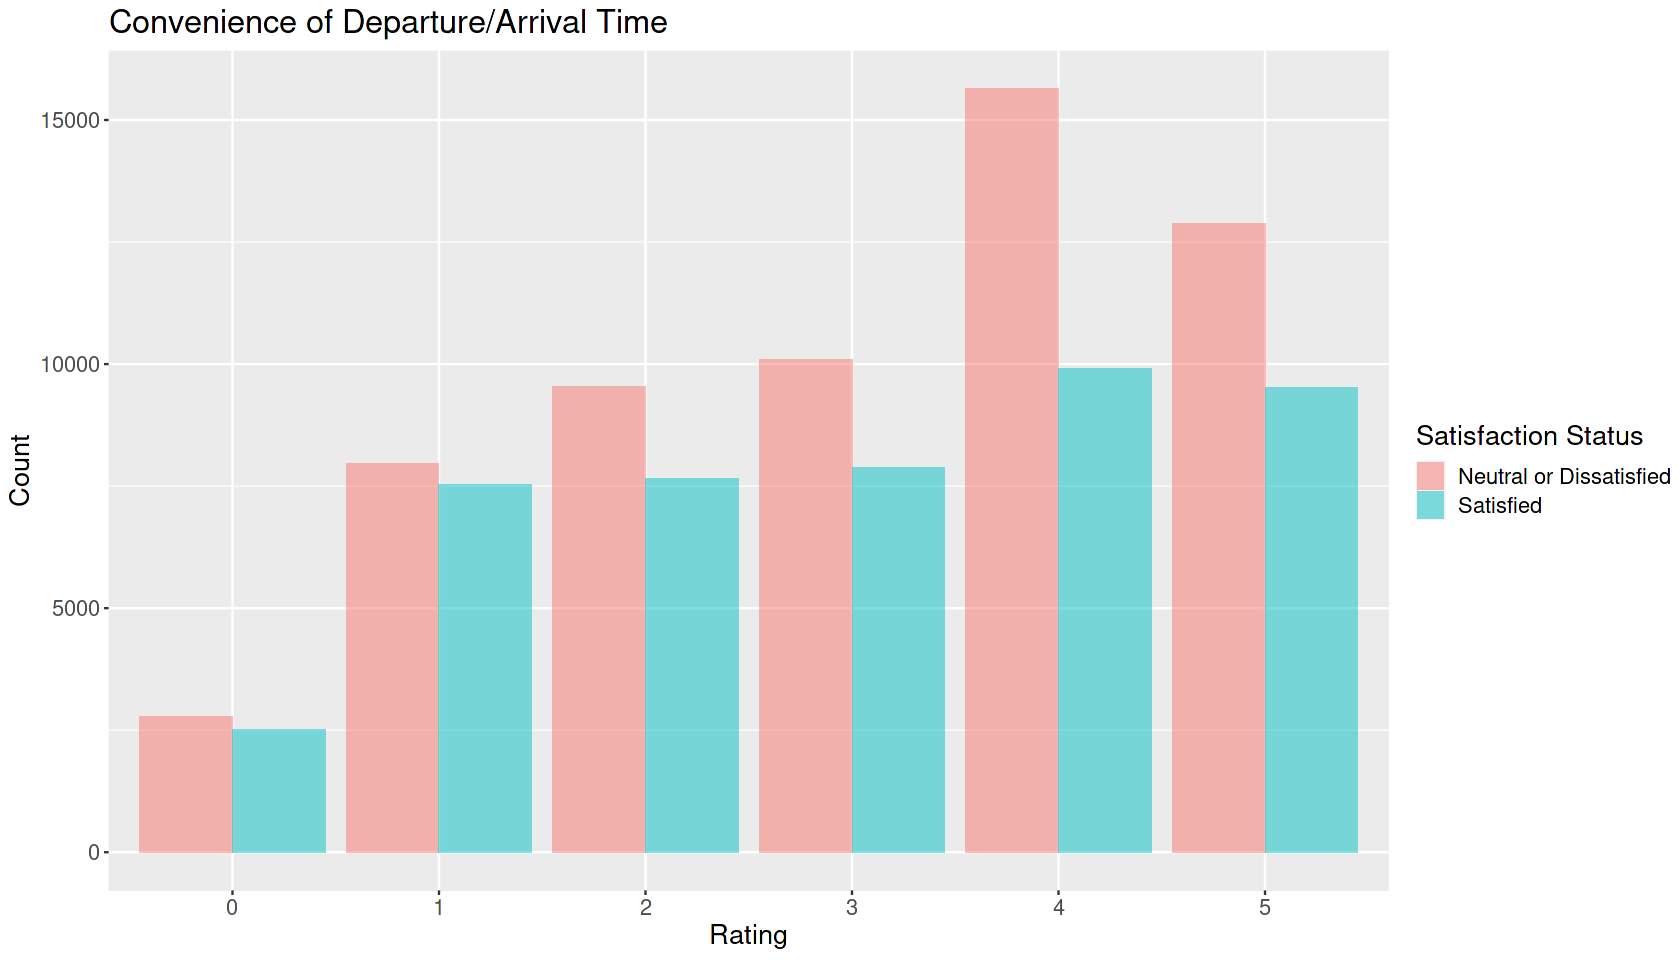

In [34]:
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(ds, aes(x=`Departure.Arrival.time.convenient`, fill =`satisfaction`))+
  geom_bar(position="dodge", alpha=0.5)+
  labs(x="Rating", y="Count", title="Convenience of Departure/Arrival Time")+
  scale_fill_discrete(name = "Satisfaction Status", labels=c("Neutral or Dissatisfied", "Satisfied"))+
  theme(legend.position="right", text= element_text( size = 16))

**Observation**

- Contrary to my assumption, the number of dissatisfied customers increases with the increase of rating. 

**Customer Satisfaction and Ease of Online Booking**

Since increase in the ease of online booking tends to increase satisfaction, as indicated by logistic regression analysis, the number of satisfied customers should should be higher than dissatisfied/neutral customers for the highest rating (=5) in ease of online booking.

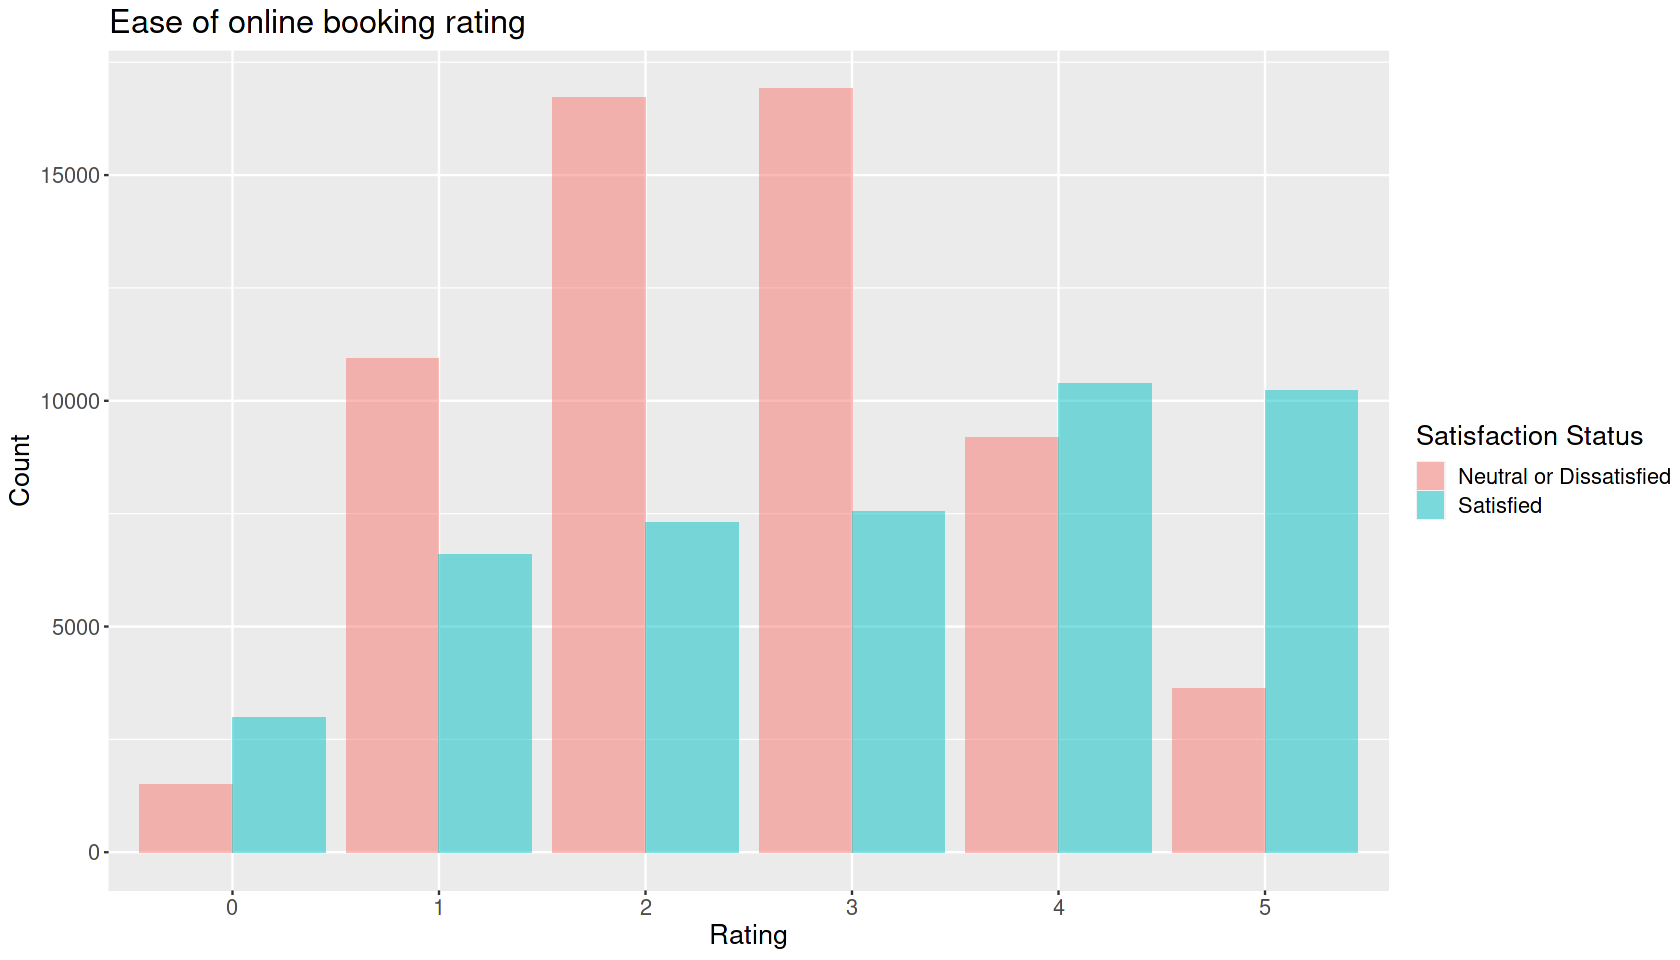

In [35]:
options(repr.plot.width = 14, repr.plot.height = 8)
ggplot(ds, aes(x=`Ease.of.Online.booking`, fill =`satisfaction`))+
  geom_bar(position="dodge", alpha=0.5)+
  labs(x="Rating", y="Count", title="Ease of online booking rating")+
  scale_fill_discrete(name = "Satisfaction Status", labels=c("Neutral or Dissatisfied", "Satisfied"))+
  theme(legend.position="right", text= element_text( size = 16))

**Observation**

- As predicted, the highest rating of 5 has been given by a higher number of satisfied customers to ease of online booking. 

- As the rating decreases, the number of dissatisfied customers increases. 